# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization and machine learning
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots
import sklearn  # Scikit-learn for machine learning tools
%matplotlib inline

# Importing classifiers from XGBoost and Scikit-learn
from xgboost import XGBClassifier  # XGBoost classifier for gradient boosting
from sklearn.ensemble import (
    AdaBoostClassifier,  # AdaBoost algorithm for boosting
    BaggingClassifier,  # Bagging ensemble method
    GradientBoostingClassifier,  # Gradient boosting algorithm
    RandomForestClassifier,  # Random forest classifier
)

# Importing functions for model evaluation and tuning
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from sklearn.model_selection import RandomizedSearchCV  # For hyperparameter tuning using randomized search
from sklearn.model_selection import KFold  # For K-Fold cross-validation
from sklearn.model_selection import cross_val_score  # For evaluating model performance using cross-validation

# Importing imputer for handling missing data
from sklearn.impute import SimpleImputer  # For filling in missing values in datasets

# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification

# Importing preprocessing tools
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder  # For converting categorical labels to numerical labels
from sklearn.preprocessing import OneHotEncoder  # For converting categorical features to a one-hot encoded format

# Importing logistic regression model
from sklearn.linear_model import LogisticRegression  # For logistic regression analysis

# Importing metrics for model evaluation
from sklearn.metrics import (
    classification_report,  # To generate a report showing main classification metrics
    confusion_matrix,  # To compute confusion matrix to evaluate the accuracy of a classification
    accuracy_score,  # To compute the accuracy of the model
    recall_score,  # To compute recall (true positive rate)
    precision_score,  # To compute precision (positive predictive value)
    f1_score,  # To compute F1 score (harmonic mean of precision and recall)
    make_scorer  # To create a custom scorer for model evaluation
)

# Importing tools for handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # For oversampling minority class in imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler  # For undersampling majority class in imbalanced datasets

# Libaries to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Prevents the display of scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Loading the dataset

In [ ]:
# Imports and mounts google drive to access the data in colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loads data into a Pandas dataframe for analysis
bank_churners = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

In [ ]:
# Makes a copy of the data
data = bank_churners.copy()

## Data Overview

- Observations
- Sanity checks

###Views the first and last 5 rows of the dataset

In [ ]:
# Displays the first 5 rows of the dataset
data.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [ ]:
# Displays the last 5 rows of the dataset
data.tail(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122      4003.000                 1851         2152.000   
10123      4277.000                 2186         2091.000   
10124      5409.000                    0         5409.000   
10125      5281.000                    0         5281.000   
10126     10388.000                 1961         8427.000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

###Checks the shape of the dataset

In [ ]:
# Shows the shape of the dataset
data.shape

(10127, 21)

* The dataset has 10,127 rows and 21 columns

###Checks the attribute types

In [ ]:
# Shows information about the datatypes that are present in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 6 categorical and 15 numerical variables
* Attrition_Flag, Gender, Education_Level, Martial_Status, Income_Category and Card_Category have an object datatype as these are categorical variables
* 2 columns have null values

###Checks for Duplicated Values

In [ ]:
# Checks for duplicated values
data.duplicated().sum()

0

* There are no duplicated values in the dataset

###Checks for Missing or Null Values

In [ ]:
# Checks for missing or null values
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Education_Level has 1519 null values and Martial_Status has 749 null values

###Checks for Unique Values

In [ ]:
# Checks for unique values
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

###Checks the Statistical Summary

In [ ]:
# Displays the statistical summary of the data
data.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                10127.000    NaN                NaN   NaN   
Attrition_Flag               10127      2  Existing Customer  8500   
Customer_Age             10127.000    NaN                NaN   NaN   
Gender                       10127      2                  F  5358   
Dependent_count          10127.000    NaN                NaN   NaN   
Education_Level               8608      6           Graduate  3128   
Marital_Status                9378      3            Married  4687   
Income_Category              10127      6     Less than $40K  3561   
Card_Category                10127      4               Blue  9436   
Months_on_book           10127.000    NaN                NaN   NaN   
Total_Relationship_Count 10127.000    NaN                NaN   NaN   
Months_Inactive_12_mon   10127.000    NaN                NaN   NaN   
Contacts_Count_12_mon    10127.000    NaN                NaN   NaN   
Credit_Limit             10127.000    NaN                NaN   NaN   
Total_Revolving_Bal      10127.000    NaN                NaN   NaN   
Avg_Open_To_Buy          10127.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     10127.000    NaN                NaN   NaN   
Total_Trans_Amt          10127.000    NaN                NaN   NaN   
Total_Trans_Ct           10127.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      10127.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    10127.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                739177606.334 36903783.450 708082083.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.326        8.017        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.346        1.299         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  35.928        7.986        13.000   
Total_Relationship_Count         3.813        1.554         1.000   
Months_Inactive_12_mon           2.341        1.011         0.000   
Contacts_Count_12_mon            2.455        1.106         0.000   
Credit_Limit                  8631.954     9088.777      1438.300   
Total_Revolving_Bal           1162.814      814.987         0.000   
Avg_Open_To_Buy               7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1             0.760        0.219         0.000   
Total_Trans_Amt               4404.086     3397.129       510.000   
Total_Trans_Ct                  64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1              0.712        0.238         0.000   
Avg_Utilization_Ratio            0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        46.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  1.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000       

* The average customer age is 46 years old.
* The eldest customer is 73 years old and the youngest customer is 26 years old.
* The average customer has 2.3 dependents.
* The bank has contacted an average of 2.455 times on a 12-month period.
* The Average Utilization Ratio, which refers to the customer's percentage of credit used, has a mean of 27.5%.
* The average customer has made around 64.859 total transactions.

In [ ]:
# Displays the statistical summary of the columns with "object" datatype
data.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

* Education_Level has 8608 non-null entries. The rest of the entries will be imputed after the data is split into training, validation, and test sets to avoid data leakage.
* Most customers have a Graduate degree.
* Martial_Status has 9378 non-null entries. The rest of the entries will be imputed after the data is split into training, validation, and test sets to avoid data leakage.
* Most customers are married.
* Attrition_Flag has 2 unique values and most customers are "Existing Customer".
* Gender has 2 unique values and most customers are female.
* Income_Category has 6 unique values and most customers earn less than $40K.
* Card_Category has 4 unique values and most customers have a Blue card.

###Checks the Percentage of Classes in Attrition Flag Column

In [ ]:
# Displays the percentage of classes in the Attrition_Flag (target variable) column
data["Attrition_Flag"].value_counts(1)

Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64

* 16.1% of customers are attrited customers.

###Pre-EDA Data Preprocessing

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Drops the "CLIENTUM" column as it is unnecessary for analysis
dataframe = data.drop("CLIENTNUM", axis=1)

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Encodes Existing and Attrited customers to 1 and 0
dataframe["Attrition_Flag"] = dataframe["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Checks the first 5 rows of the new dataframe
dataframe.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Checks values of Income_Category column
dataframe["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Replaces "abc" entries using np.nan
dataframe["Income_Category"].replace('abc', np.nan, inplace=True)

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Checks the new values of Income_Category column
dataframe["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Displays information about the Income_Category column
dataframe['Income_Category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Income_Category
Non-Null Count  Dtype 
--------------  ----- 
9015 non-null   object
dtypes: object(1)
memory usage: 79.2+ KB


* Income_Category has 9015 non-null entries. The null entries in this column will be imputed after splitting the data into training, validation and test sets to avoid data leakage.

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Creates a list with column names that need to be converted from "object" to "category" data type.
category_cols = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Income_Category'
]

# Converts columns with "object" data type to "category" data type.
dataframe[category_cols] = dataframe[category_cols].astype('category')

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Displays the datatypes of the new dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

* The "object" datatype was converted to "category"

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Checks for new na balues to impute after train-test split
dataframe.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###**Univariate Analysis**

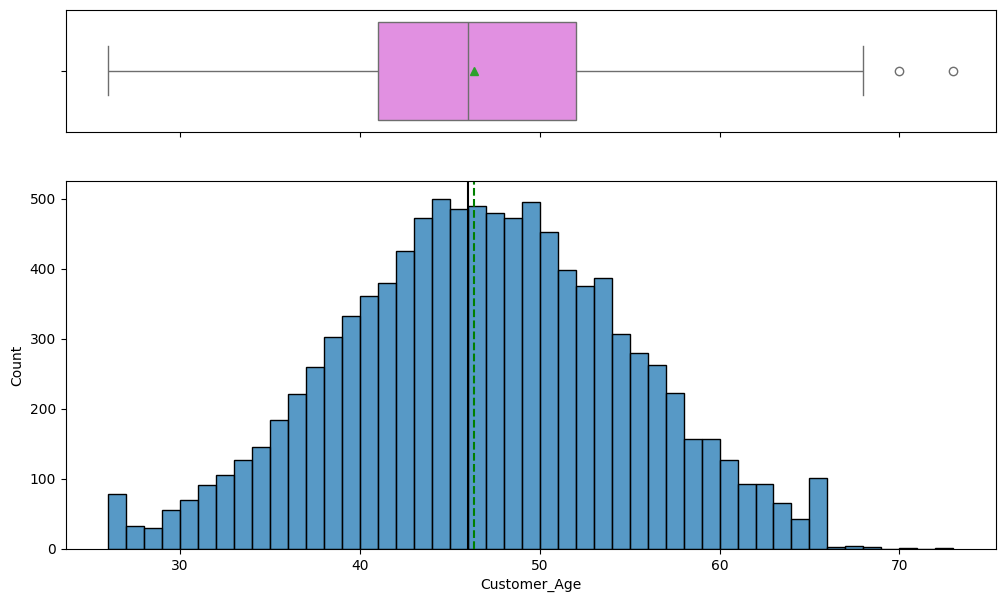

In [ ]:
# Shows the histogram and boxplot for the Customer_Age variable
histogram_boxplot(dataframe, 'Customer_Age')

* The median age of customer is 46 years old.
* Age has two outliers.
* The plots have a normal distribution.

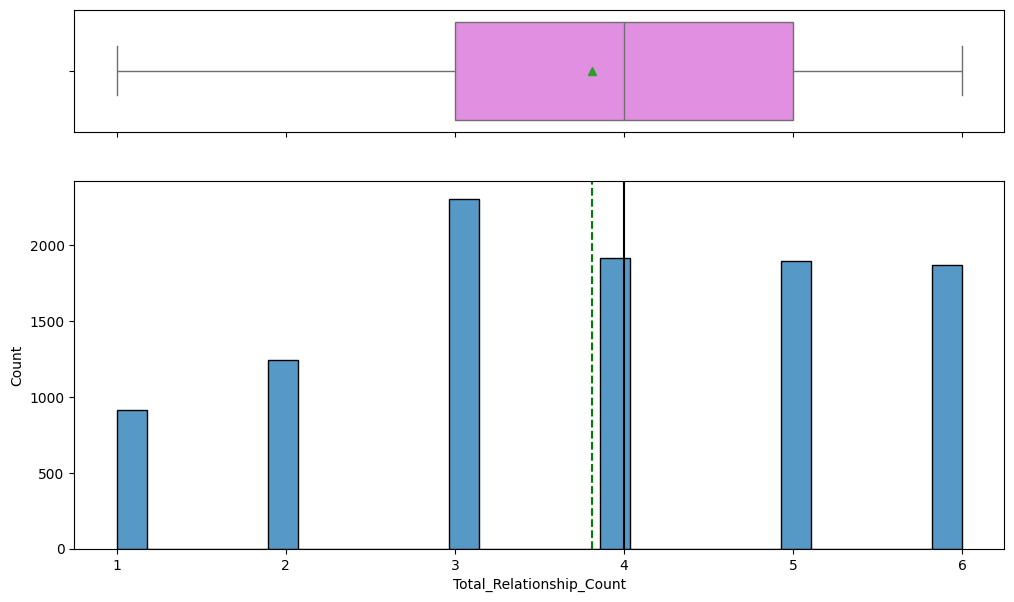

In [ ]:
# Shows the histogram and boxplot for the Total_Relationship_Count variable
histogram_boxplot(dataframe, 'Total_Relationship_Count')

* The plot is left-skewed and has no outliers.

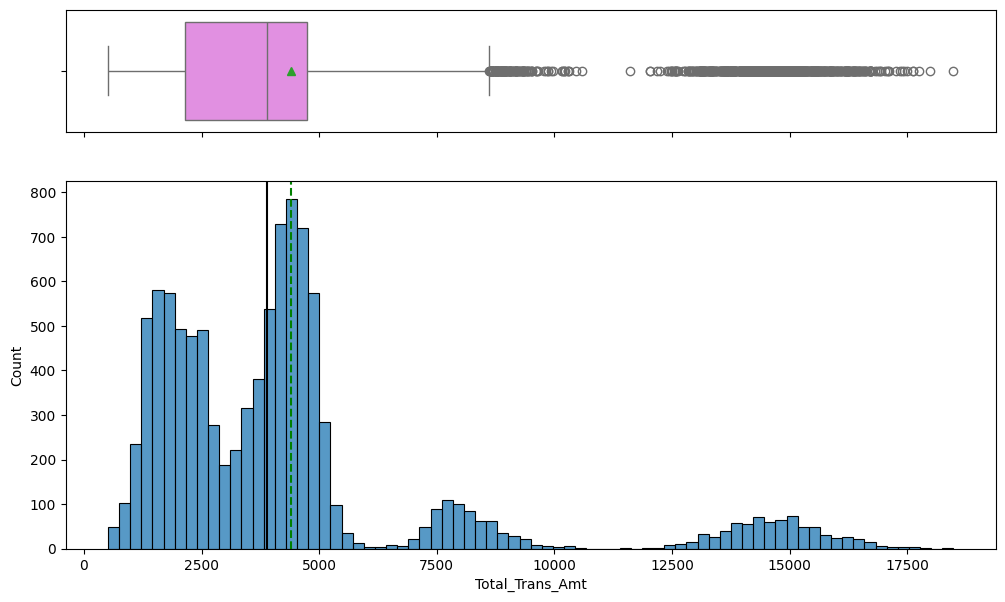

In [ ]:
# Shows the histogram and boxplot of the Total_Trans_Amt variable
histogram_boxplot(dataframe, 'Total_Trans_Amt')

* The boxplot has many outliers.
* The histogram has a right-skewed distribution.
* The median is approximately $4,000.

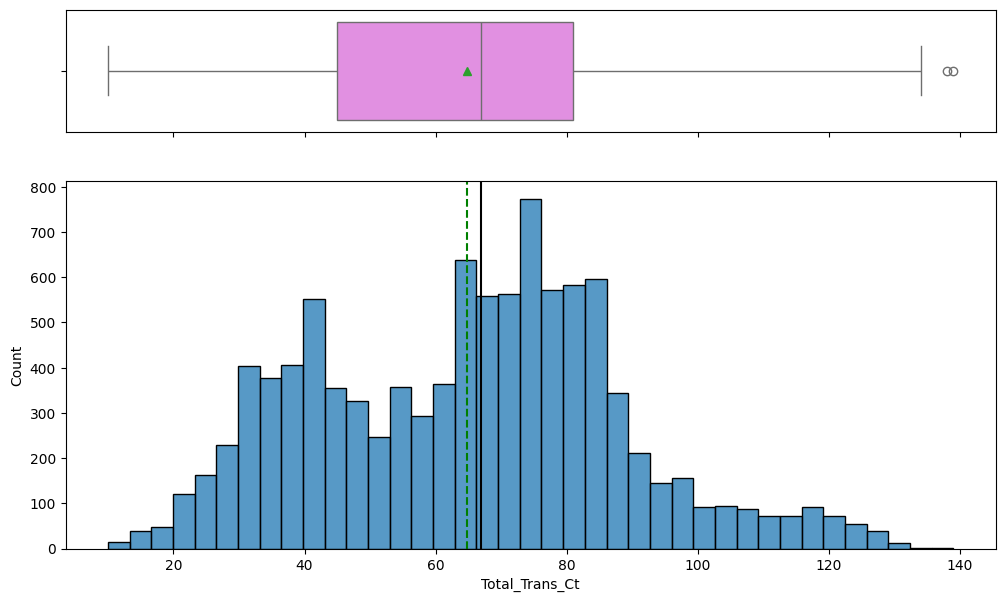

In [ ]:
# Shows the histogram and boxplot of the Total_Trans_Ct
histogram_boxplot(dataframe, 'Total_Trans_Ct')

* The boxplot has two outliers.
* The histogram shows a normal distribution.

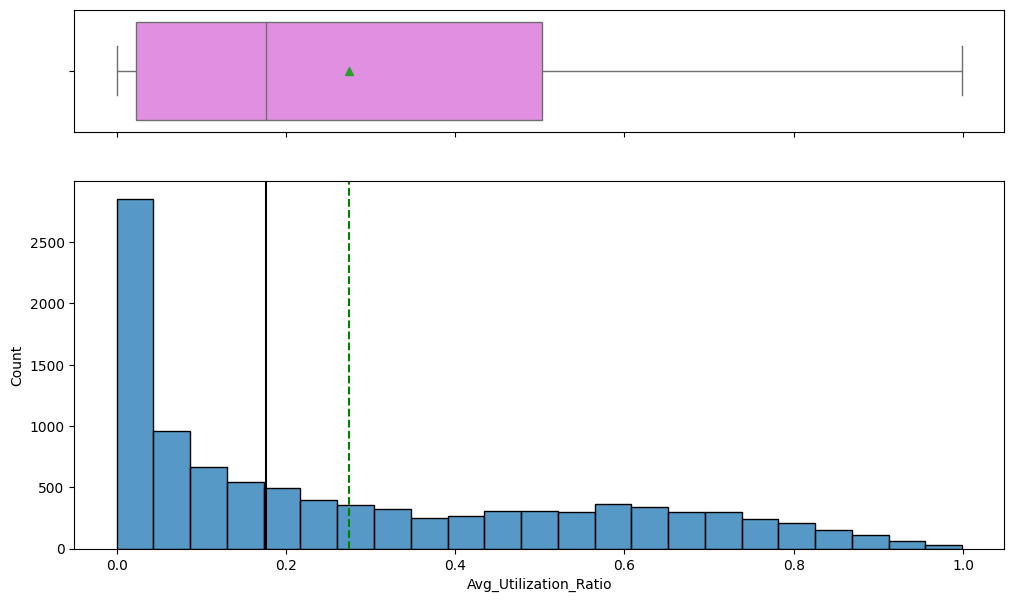

In [ ]:
# Shows the histogram and boxplot of the Avg_Utilization_Ratio variable
histogram_boxplot(dataframe, 'Avg_Utilization_Ratio')

* The boxplot shows no outliers.
* Both plots have a right-skewed distribution.

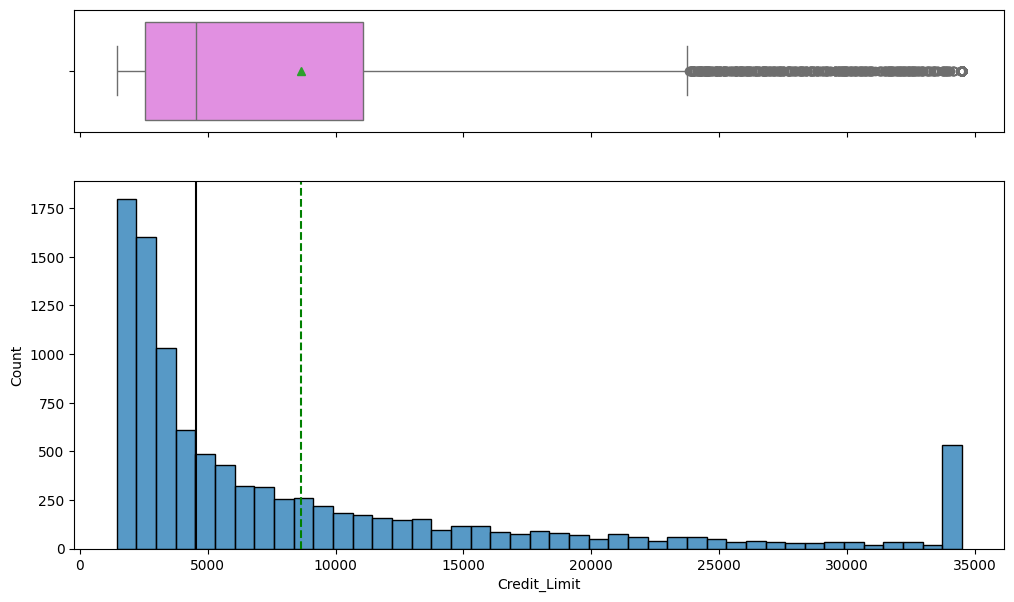

In [ ]:
# Shows the histogram and boxplot for the Credit_Limit variable
histogram_boxplot(dataframe, 'Credit_Limit')

* The variable has a right-skewed distribution with many outliers.

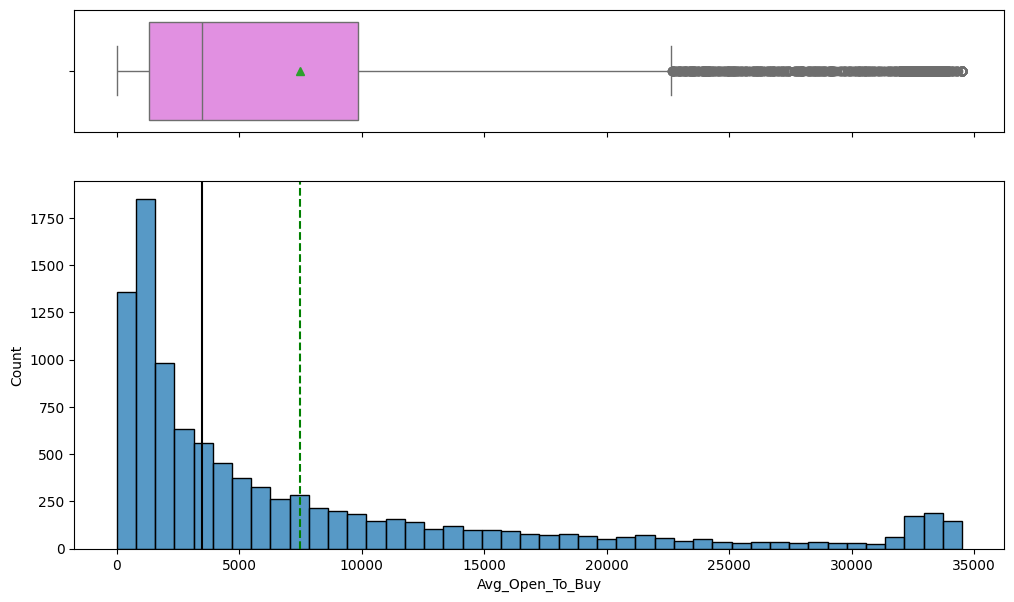

In [ ]:
# Shows the histogram and boxplot for the Avg_Open_To_Buy variable
histogram_boxplot(dataframe, 'Avg_Open_To_Buy')

* Both plots have a right-skewed distribution.
* The boxplot suggests that the variable has many outliers.

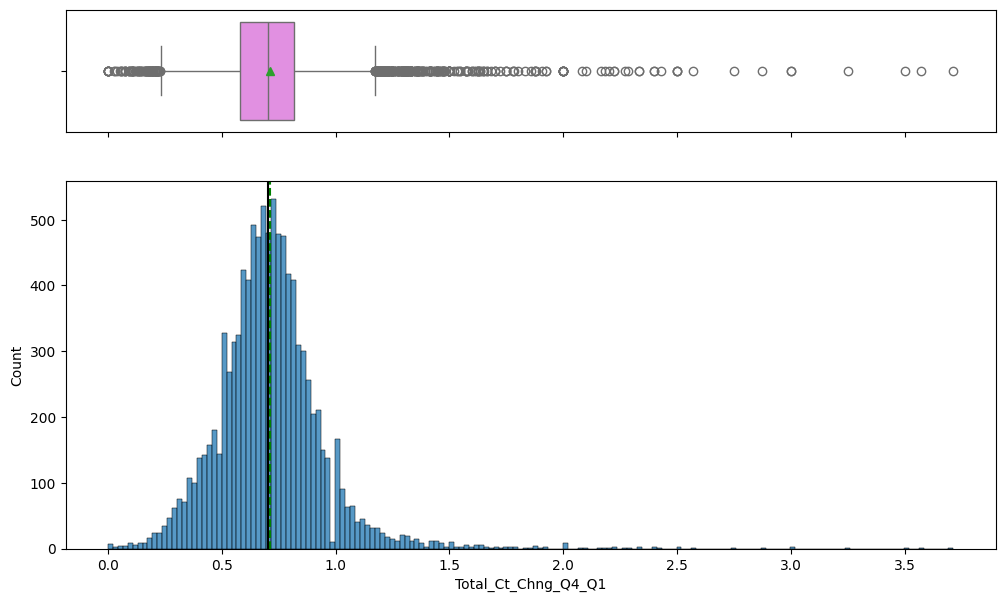

In [ ]:
# Shows the histogram and boxplot of the Total_Ct_Chng_Q4_Q1 variable
histogram_boxplot(dataframe, 'Total_Ct_Chng_Q4_Q1')

* The plot is centered around 0.6 and has a normal distribution.
* The boxplot suggests that the variable has many outliers.

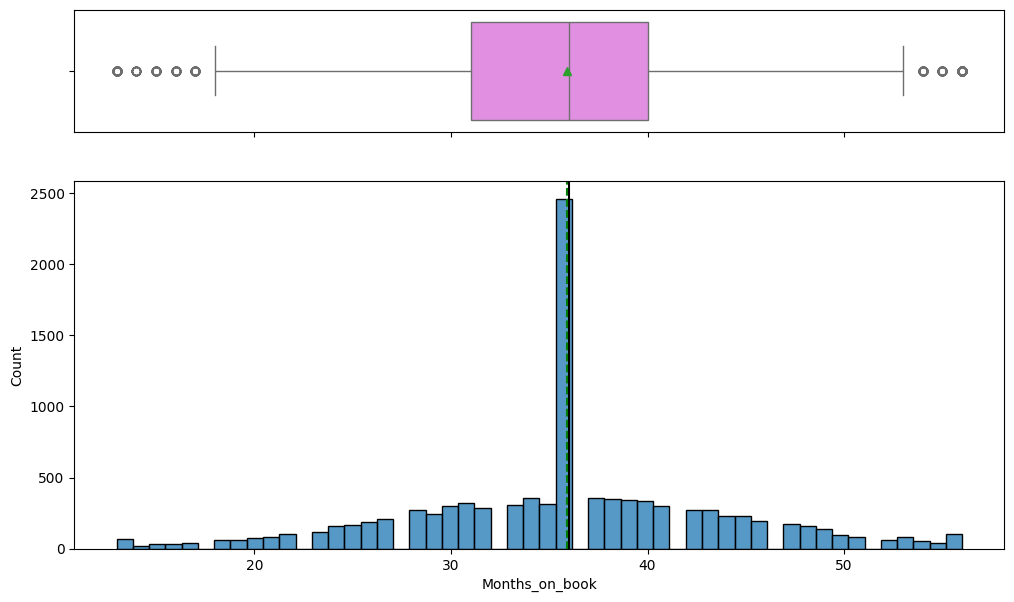

In [ ]:
# Shows the histogram and boxplot of the Months_on_book variable
histogram_boxplot(dataframe, 'Months_on_book')

* Both plots have a normal distribution with a few outliers.

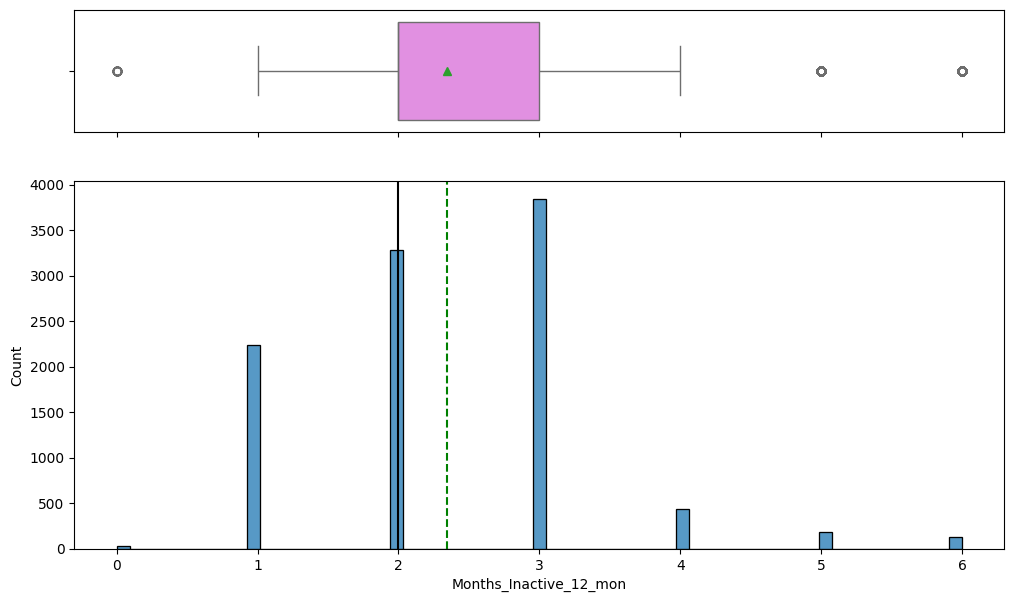

In [ ]:
# Shows the histogram and boxplot of the Months_Inactive_12_mon variable
histogram_boxplot(dataframe, 'Months_Inactive_12_mon')

* The variable has a few outliers.
* The variable has a normal distribution.

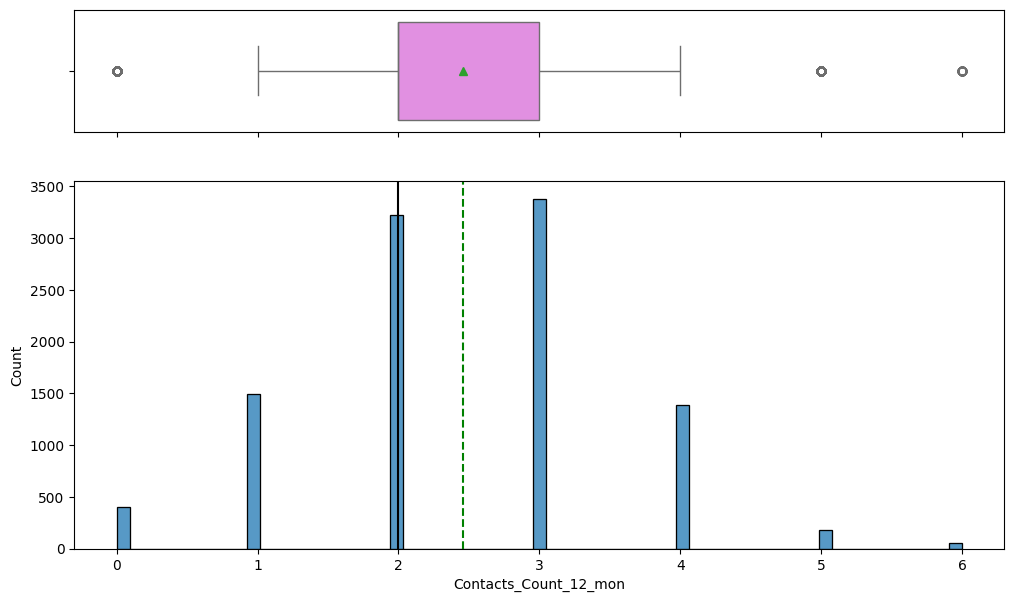

In [ ]:
# Shows the histogram and boxplot of the Contacts_Count_12_mon variable
histogram_boxplot(dataframe, 'Contacts_Count_12_mon')

* The boxplot suggests that the variable has a few outliers.
* The variable has a normal distribution.

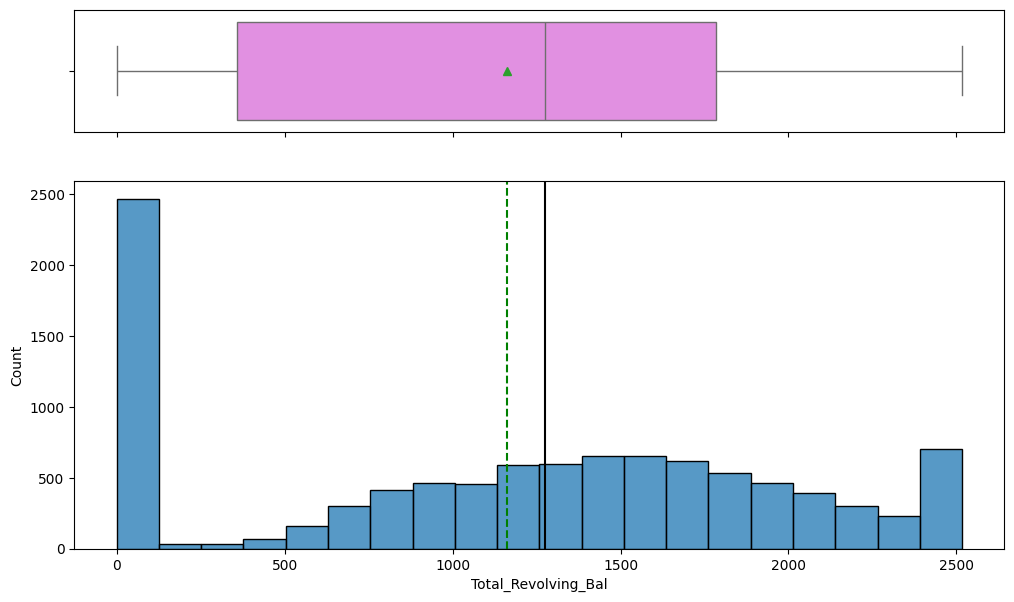

In [ ]:
# Shows the histogram and boxplot of the Total_Revolving_Bal variable
histogram_boxplot(dataframe, 'Total_Revolving_Bal')

* The plot shows a slightly left-skewed distribution with no outliers.
* Many customers have a Total_Revolving_Bal of 0, which means they pay off their balance every month
* The average Total_Revolving_Bal is approximately $1250.

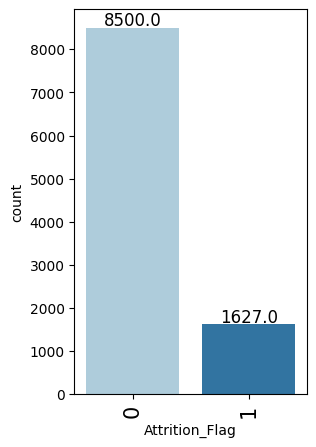

In [ ]:
# Shows the labeled barplot for the Attrition_Flag variable
labeled_barplot(dataframe, 'Attrition_Flag')

In [ ]:
# Shows the percentage of existing and attrited customers
dataframe.Attrition_Flag.value_counts(1)

Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64

* 83.9% (8500) of customers are existing customers.
* 16.1% (1627) of customers are attrited customers.

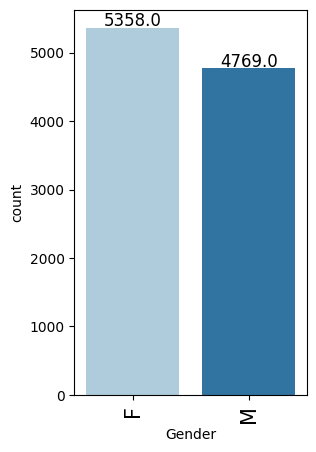

In [ ]:
# Shows the labeled barpot for the Gender variable
labeled_barplot(dataframe, 'Gender')

In [ ]:
# Shows the percentage of male and female customers
dataframe.Gender.value_counts(1)

Gender
F   0.529
M   0.471
Name: proportion, dtype: float64

* 52.9% of customers are female and 47.1% of customers are male.

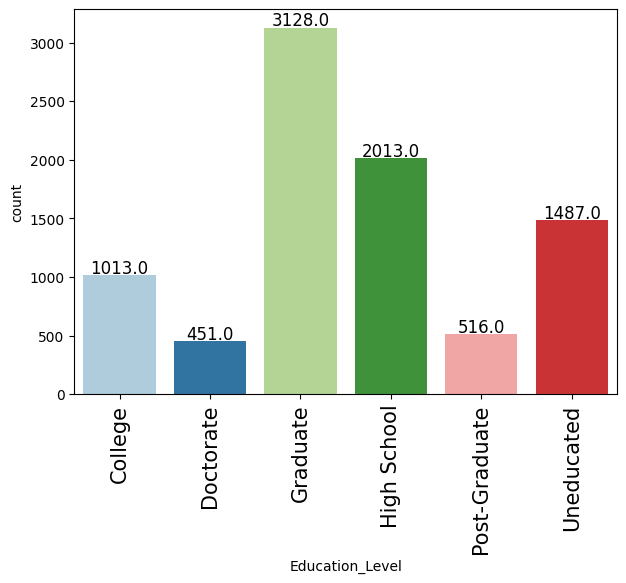

In [ ]:
# Shows the labeled barplot for the Education_Level variable
labeled_barplot(dataframe, 'Education_Level')

In [ ]:
# Shows the percentage of the values for the Education_Level variable
dataframe.Education_Level.value_counts(1)

Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64

* 36.3% of customers have a Graduate degree
* 17.3% of customers are uneducated
* 0.052% of customers have a Doctorate degree

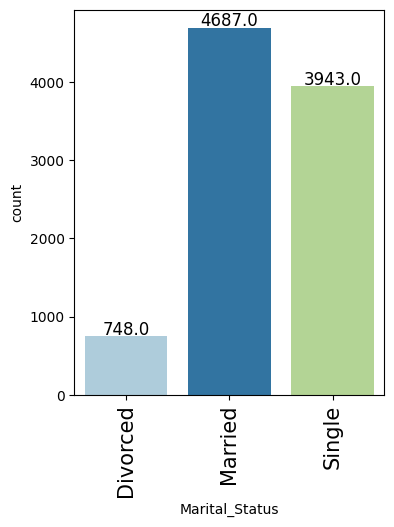

In [ ]:
# Shows the labeled barplot for the Martial_Status variable
labeled_barplot(dataframe, 'Marital_Status')

In [ ]:
# Shows the percentage of values for the Martial_Status variable
dataframe.Marital_Status.value_counts(1)

Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: float64

* 50% of customers are married
* 42% of customers are single
* 8% of customers are divorced

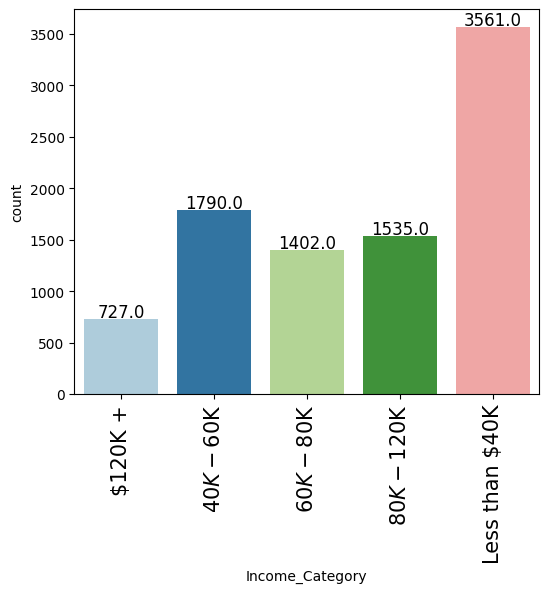

In [ ]:
# Shows the labeled barplot for the Income_Category variable
labeled_barplot(dataframe, 'Income_Category')

In [ ]:
# Shows the percentage of values of the Income_Category variable
dataframe.Income_Category.value_counts(1)

Income_Category
Less than $40K   0.395
$40K - $60K      0.199
$80K - $120K     0.170
$60K - $80K      0.156
$120K +          0.081
Name: proportion, dtype: float64

* 39.5% of customers earn less than $40K


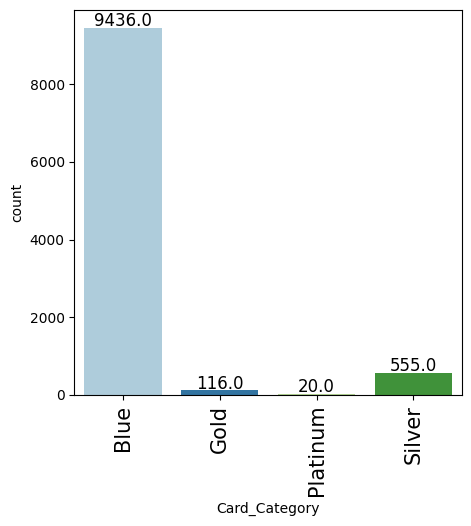

In [ ]:
# Shows the labeled barplot for the Card_Category variable
labeled_barplot(dataframe, 'Card_Category')

In [ ]:
# Shows the percentage of values for the Card_Category variable
dataframe.Card_Category.value_counts(1)

Card_Category
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: proportion, dtype: float64

* 93.2% of customers have a Blue card
* 5.5% of customers have a Silver card

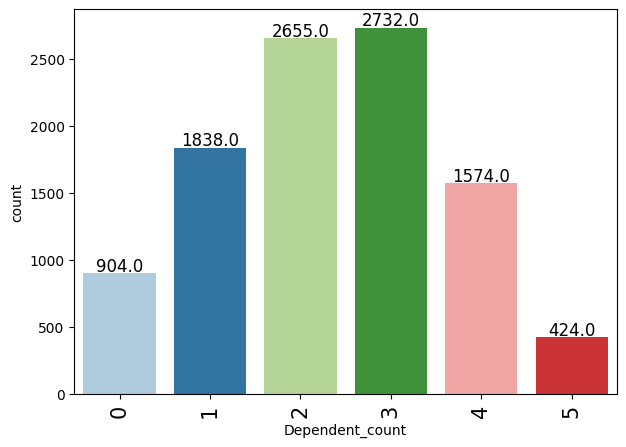

In [ ]:
# Shows the labeled barplot for the Dependent_count variable
labeled_barplot(dataframe, 'Dependent_count')

In [ ]:
# Shows the percentage of values for the Dependent count variable
dataframe.Dependent_count.value_counts(1)

Dependent_count
3   0.270
2   0.262
1   0.181
4   0.155
0   0.089
5   0.042
Name: proportion, dtype: float64

* 27% of customers have 3 dependents
* 26.2% of customers have 2 dependents
* 8.9% of customers have 0 dependents
* 4.2% of customers have 5 dependents

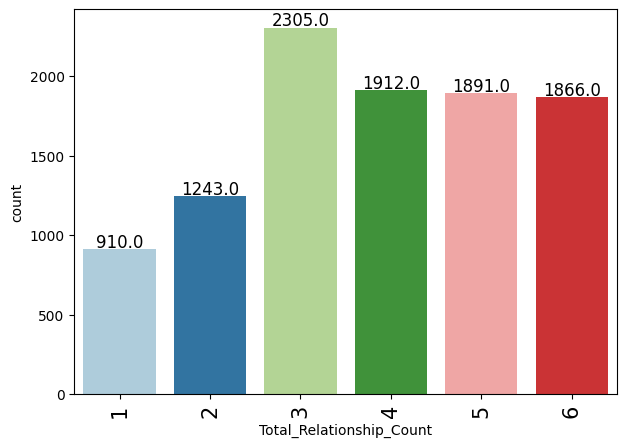

In [ ]:
# Shows the labeled barplot of the Total_Relationship_Count variable
labeled_barplot(dataframe, 'Total_Relationship_Count')

In [ ]:
# Shows the percentage of values for the Total_Relationship_Count variable
dataframe.Total_Relationship_Count.value_counts(1)

Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64

* 22.8% of customers have used 3 products
* 18.9% of customers have used 4 products
* 18.7% of customers have used 5 products
* 18.4% of customers have used 6 products

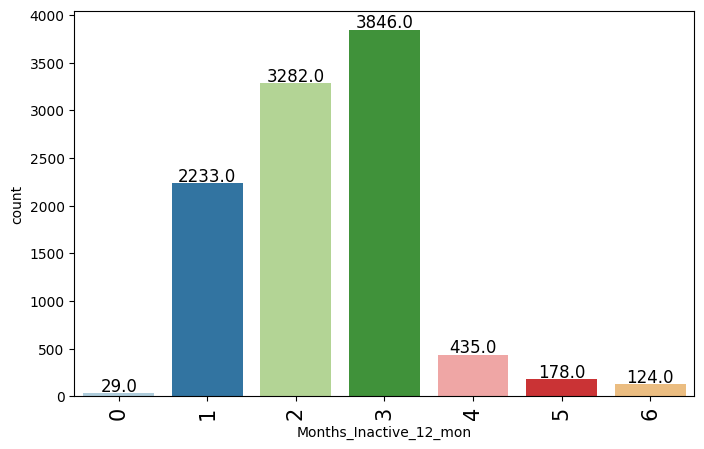

In [ ]:
# Shows the labeled barplot for the Months_Inactive_12_mon variable
labeled_barplot(dataframe, 'Months_Inactive_12_mon')

In [ ]:
# Shows the percentage of values for the Months_Inactive_12_mon variable
dataframe.Months_Inactive_12_mon.value_counts(1)

Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64

* 38% of customers have an account that is 3 months inactive
* 32.4% of customers have an account that is 2 months inactive
* 22% of customers have an account that is 1 month inactive

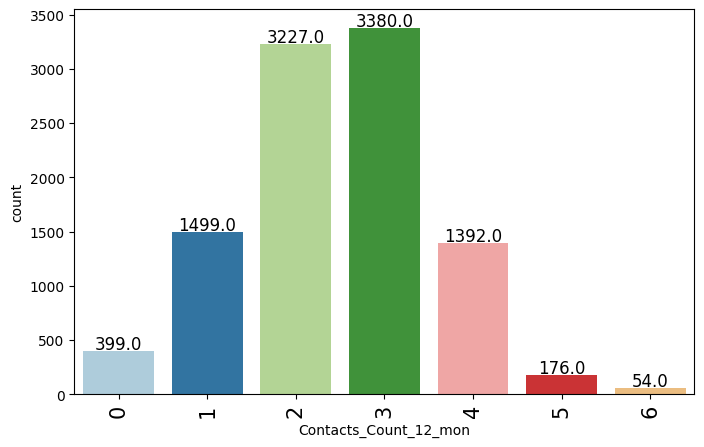

In [ ]:
# Shows the labeled barplot for the Contacts_Count_12_mon variable
labeled_barplot(dataframe, 'Contacts_Count_12_mon')

In [ ]:
# Shows the percentage of values for the Contacts_Count_12_mon variable
dataframe.Contacts_Count_12_mon.value_counts(1)

Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: proportion, dtype: float64

* 33.4% of customers were contacted 3 times in the last 12 months
* 31.9 of customers were contacted 2 times in the last 12 months
* 3.9% of customers were never contacted in the last 12 months

###**Multivariate Analysis**

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


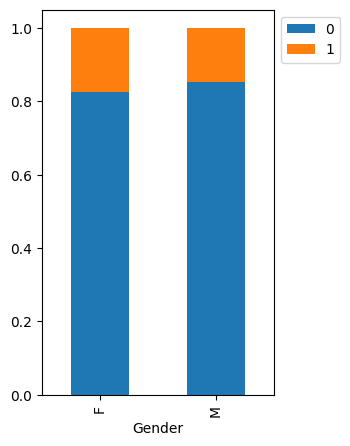

In [ ]:
# Generates a stacked barplot to show the relationship between Gender and Attrition_Flag
stacked_barplot(dataframe, 'Gender', 'Attrition_Flag')

* Gender has no effect on attrition

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


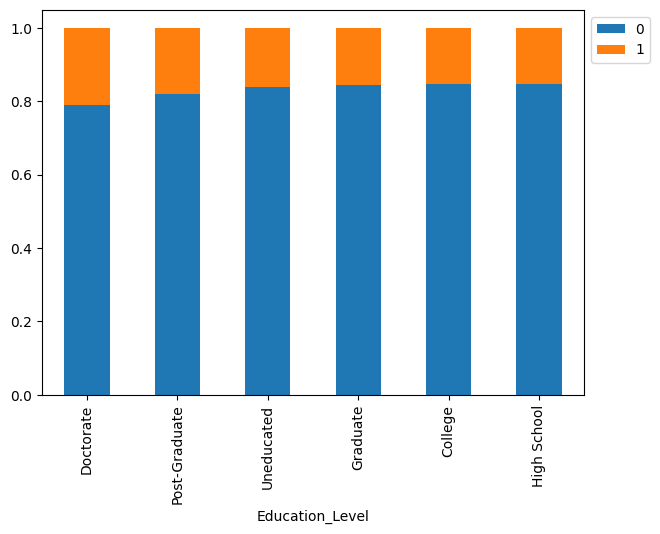

In [ ]:
# Generates a stacked barplot to show the relationship between Education_Level and Attrition_Flag
stacked_barplot(dataframe, 'Education_Level', 'Attrition_Flag')

* Education has no effect on attrition

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


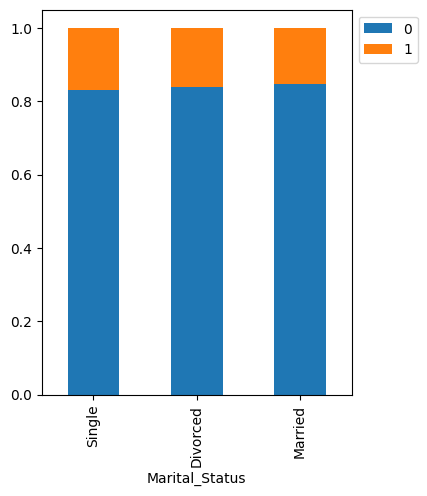

In [ ]:
# Generates a stacked barplot to show the relationship between Martial_Status and Attrition_Flag
stacked_barplot(dataframe, 'Marital_Status', 'Attrition_Flag')

* Martial_Status has no effect on attrition

Attrition_Flag      0     1   All
Income_Category                  
All              7575  1440  9015
Less than $40K   2949   612  3561
$40K - $60K      1519   271  1790
$80K - $120K     1293   242  1535
$60K - $80K      1213   189  1402
$120K +           601   126   727
------------------------------------------------------------------------------------------------------------------------


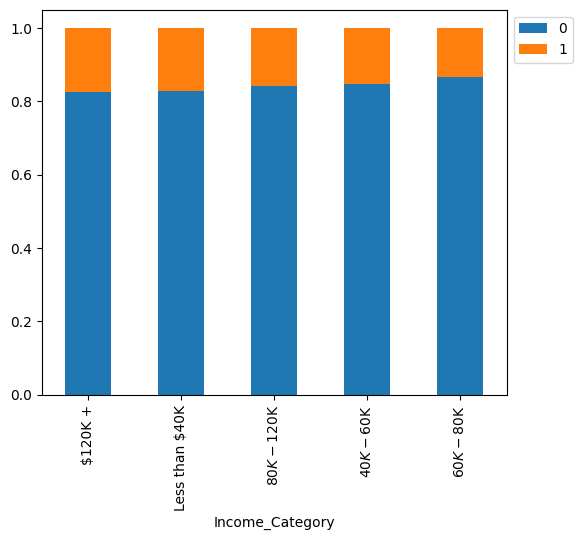

In [ ]:
# Generates a stacked barplot to show the relationship between Income_Category and Attrition_Flag
stacked_barplot(dataframe, 'Income_Category', 'Attrition_Flag')

* Income_Category has no effect on attrition

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


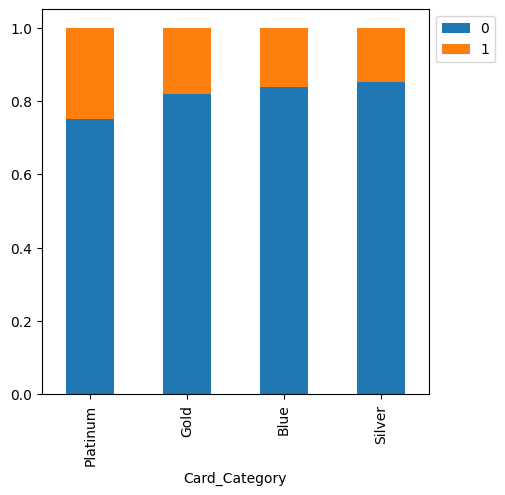

In [ ]:
# Generates a stacked barplot to show the relationship between Card_Category and Attrition_Flag
stacked_barplot(dataframe, 'Card_Category', 'Attrition_Flag')

* Card_Category has no effect on attrition

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


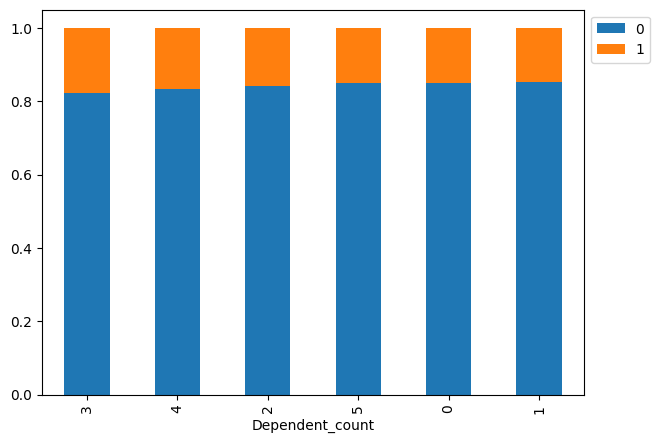

In [ ]:
# Generates a stacked barplot to show the relationship between Dependent_count and Attrition_Flag
stacked_barplot(dataframe, 'Dependent_count', 'Attrition_Flag')

* Dependent_count has no effect on attrition

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


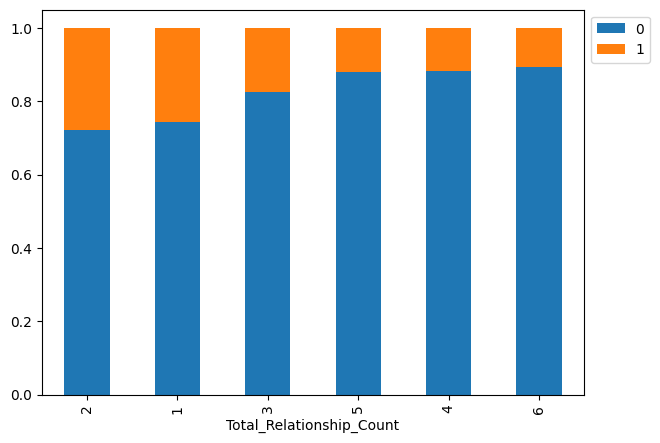

In [ ]:
# Generates a stacked barplot to show the relationship between Total_Relationship_Count and Attrition_Flag
stacked_barplot(dataframe, 'Total_Relationship_Count', 'Attrition_Flag')

* Based on the plot, the more products a customer uses, the less attrition

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


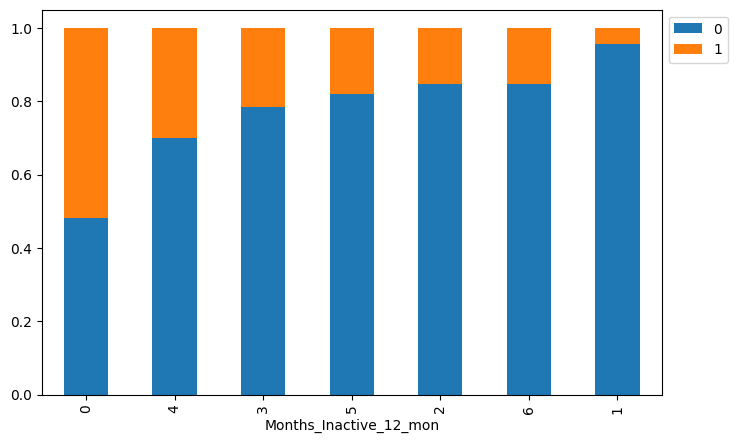

In [ ]:
# Generates a stacked barplot to show the relationship between Months_Inactive_12_mon and Attrition_Flag
stacked_barplot(dataframe, 'Months_Inactive_12_mon', 'Attrition_Flag')

* Active customers have less attrition

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


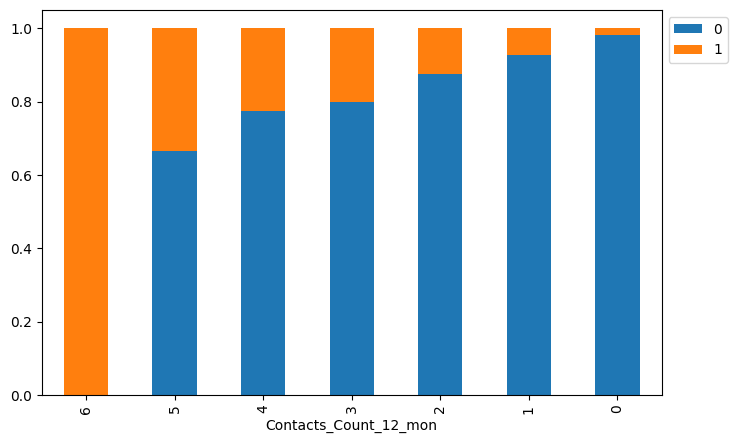

In [ ]:
# Generates a stacked barplot to show the relationship between Contacts_Count_12_mon and Attrition_Flag
stacked_barplot(dataframe, 'Contacts_Count_12_mon', 'Attrition_Flag')

* Attrited customers are contacted the most from the bank

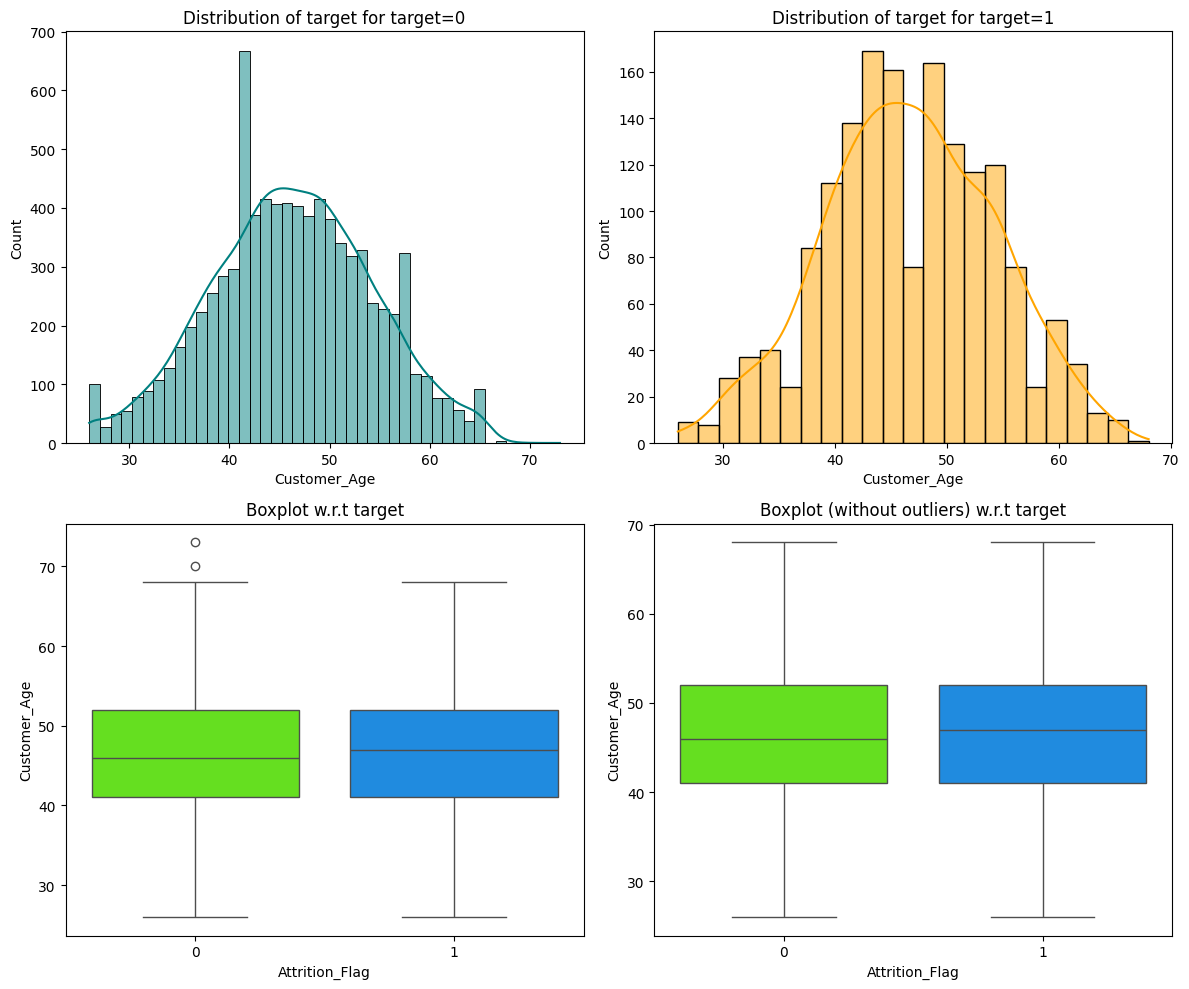

In [ ]:
# Plots the distribution of Customer_Age with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Customer_Age', 'Attrition_Flag')

* Age has a normal distribution with respect to Attrition_Flag
* The boxplot for Existing Customers has a few outliers

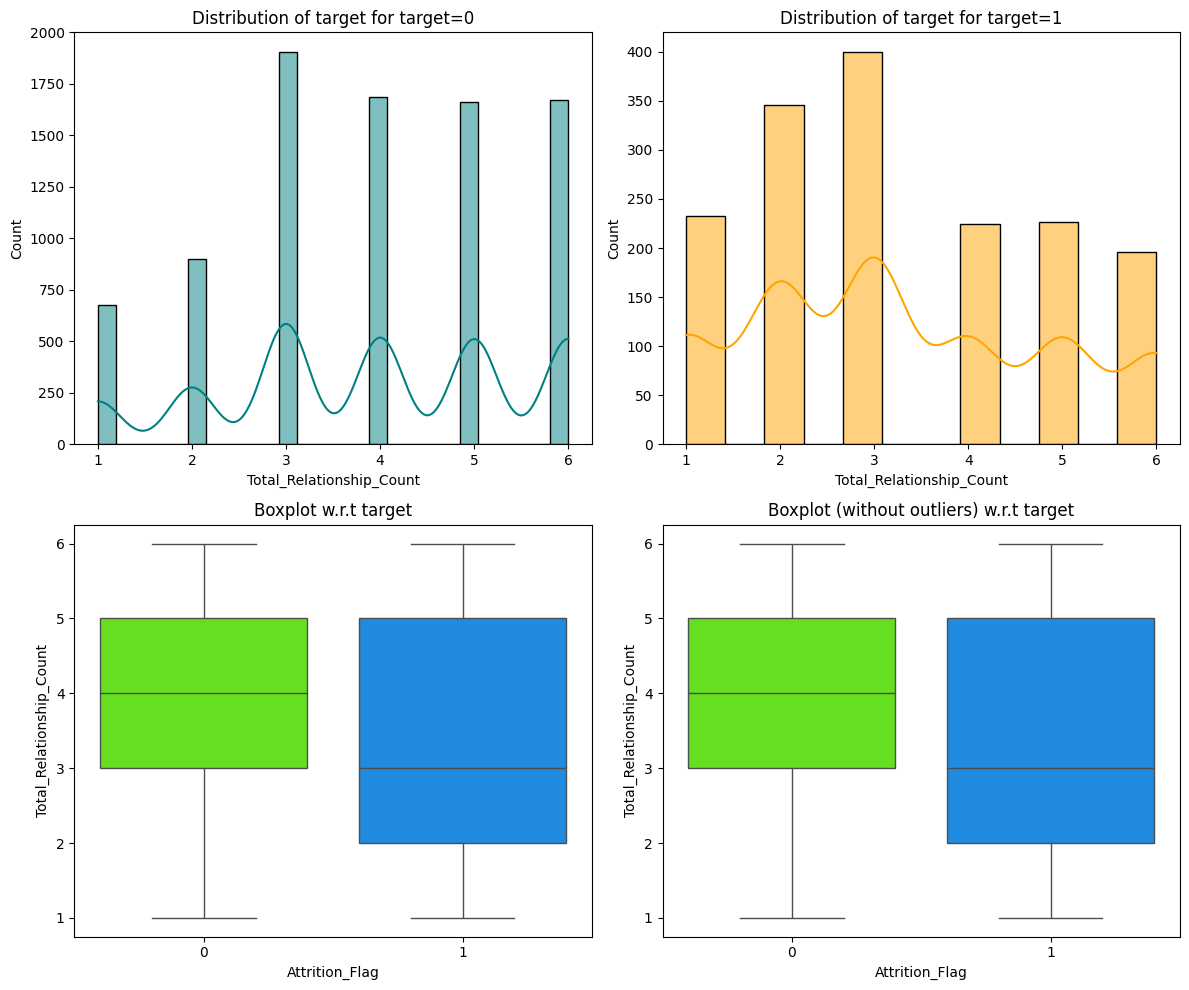

In [ ]:
# Plots the distribution of Total_Relationship_Count with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Total_Relationship_Count', 'Attrition_Flag')

* Both plots have a similar distribution.
* The boxplot for attrited customers seems more skewed

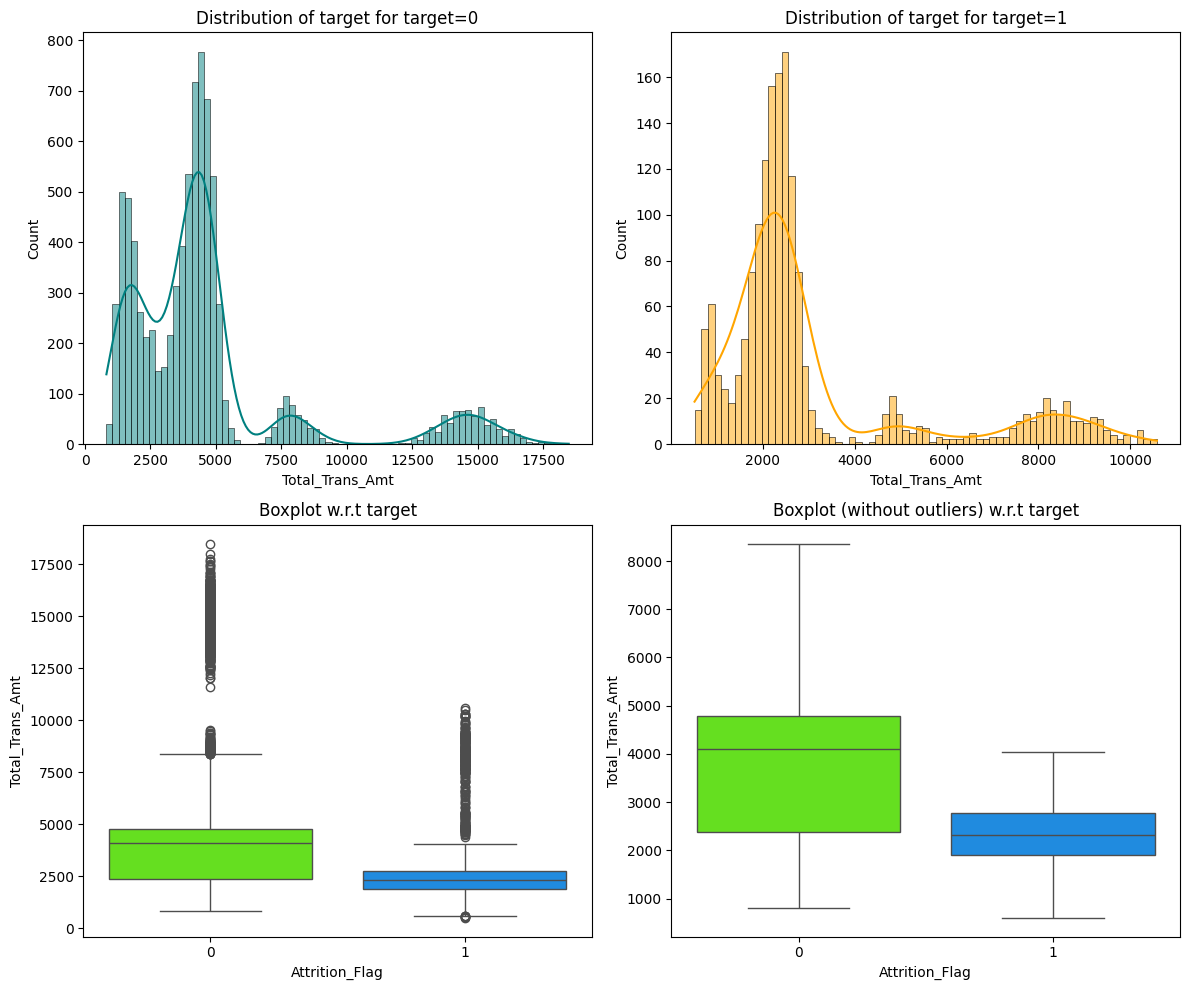

In [ ]:
# Plots the distritbution of Total_Trans_Amt with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Total_Trans_Amt', 'Attrition_Flag')

* The plots have a right-skewed distribution
* Both boxplots shows that many outliers are present

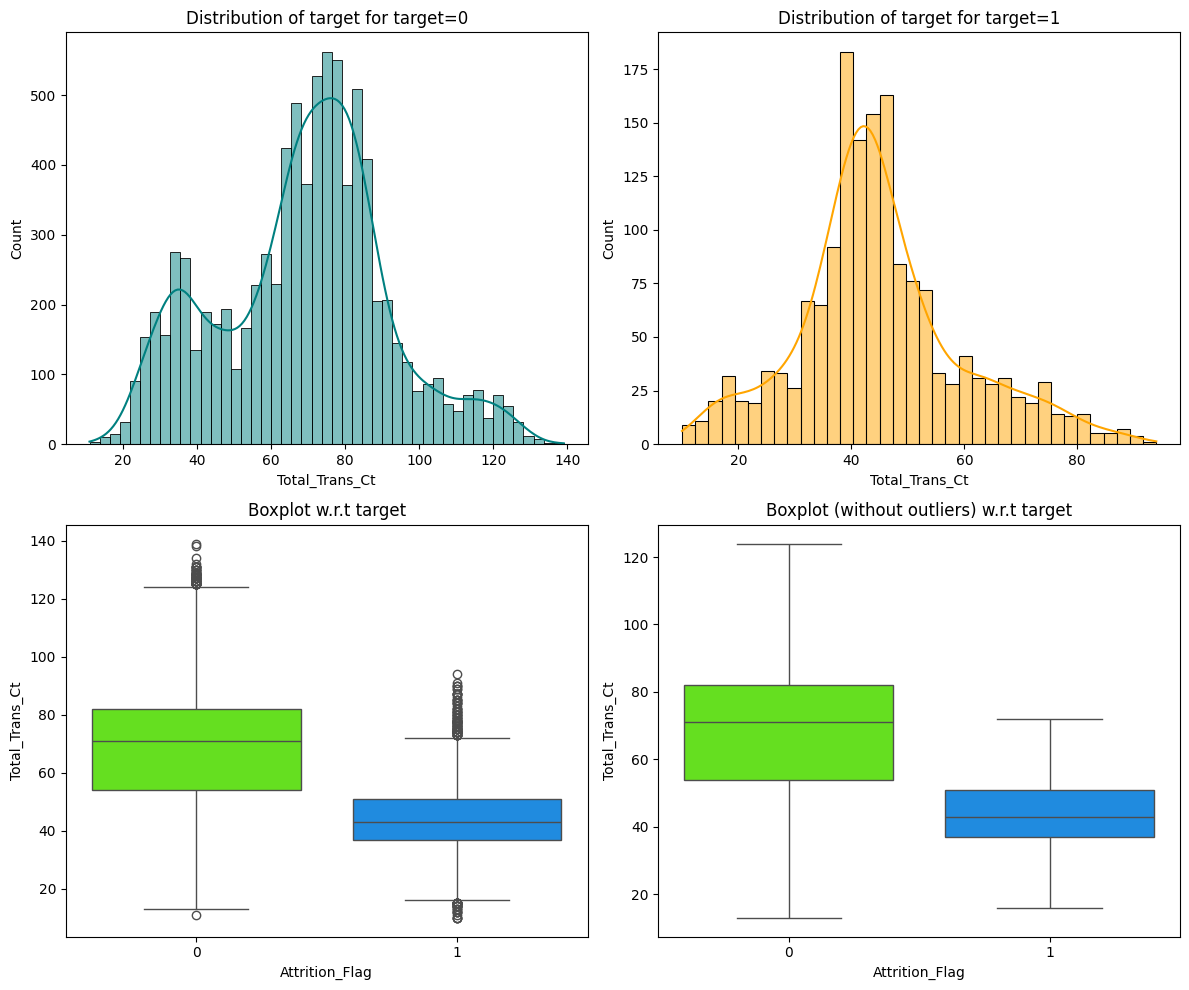

In [ ]:
# Plots the distribution of Total_Trans_Ct with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Total_Trans_Ct', 'Attrition_Flag')

* The boxplot shows that many outliers are present
* The histogram for both existing and attrited customers have a normal distribution

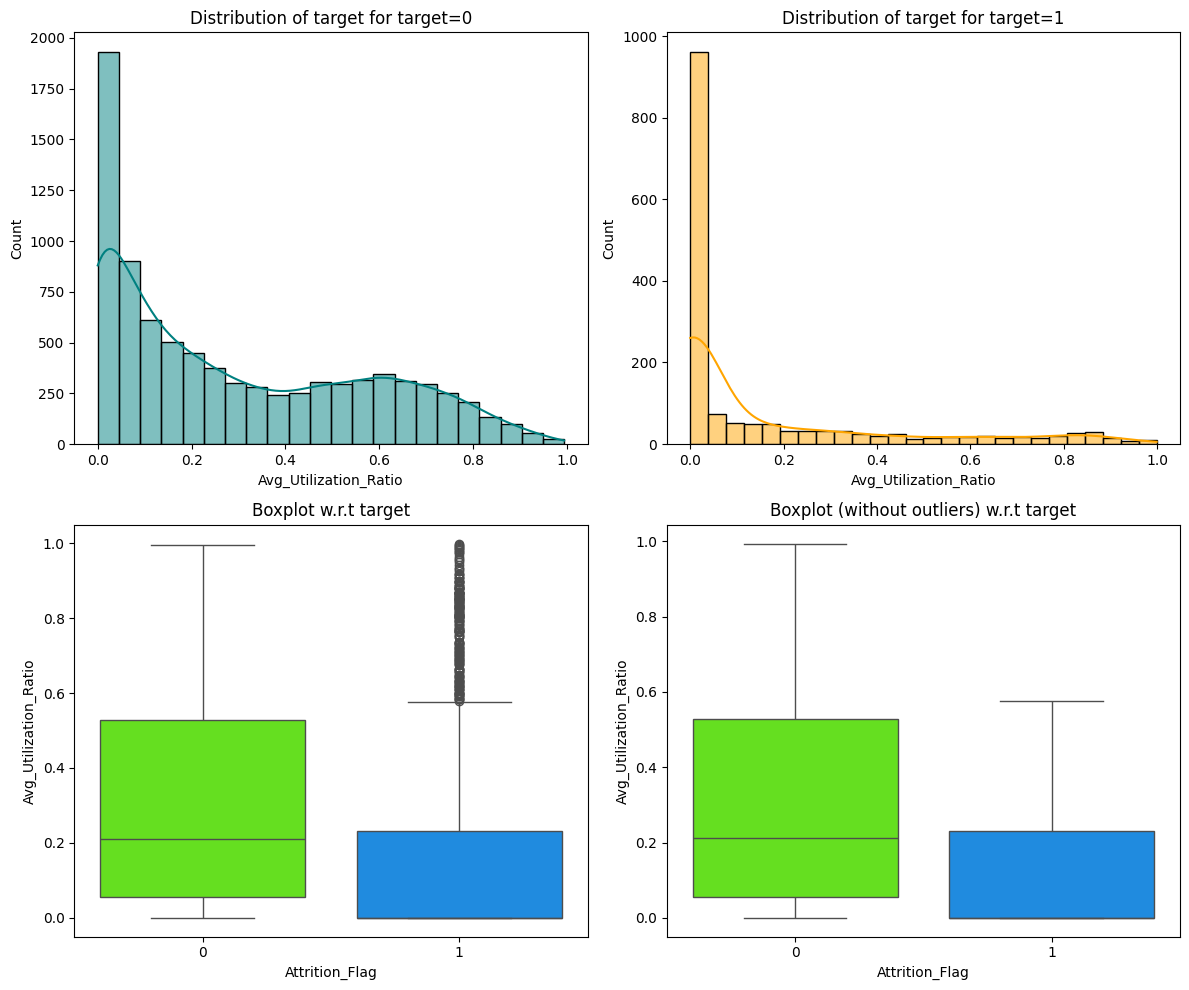

In [ ]:
# Plots the distribution of Avg_Utilization_Ratio with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Avg_Utilization_Ratio', 'Attrition_Flag')

* Both histograms have a right-skewed distribution
* The boxplot for attrited customers has many outliers

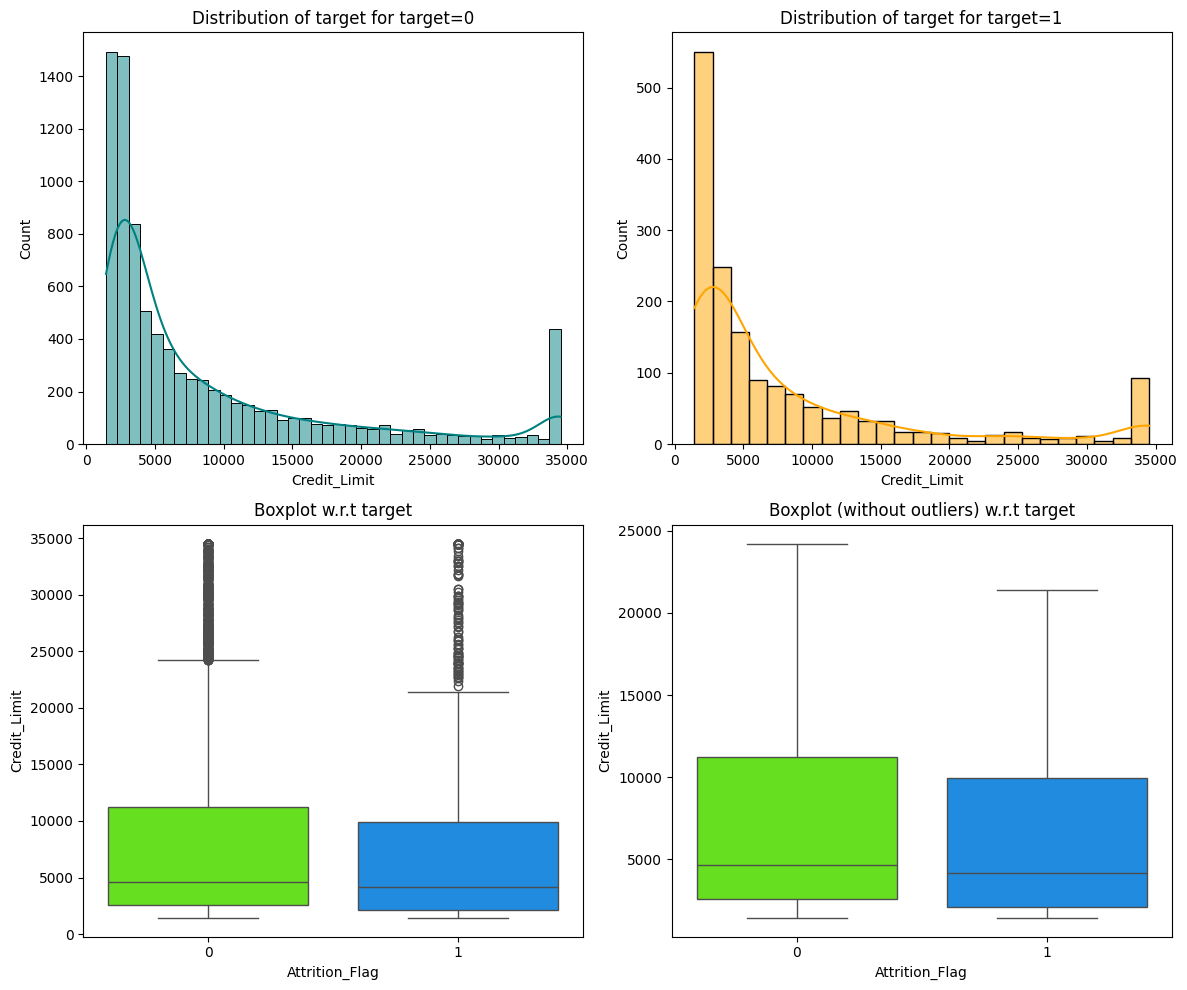

In [ ]:
# Plots the distribution of Credit_Limit with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Credit_Limit', 'Attrition_Flag')

* Both histograms have a right-skewed distribution
* Both boxplots show that the variable has many outliers

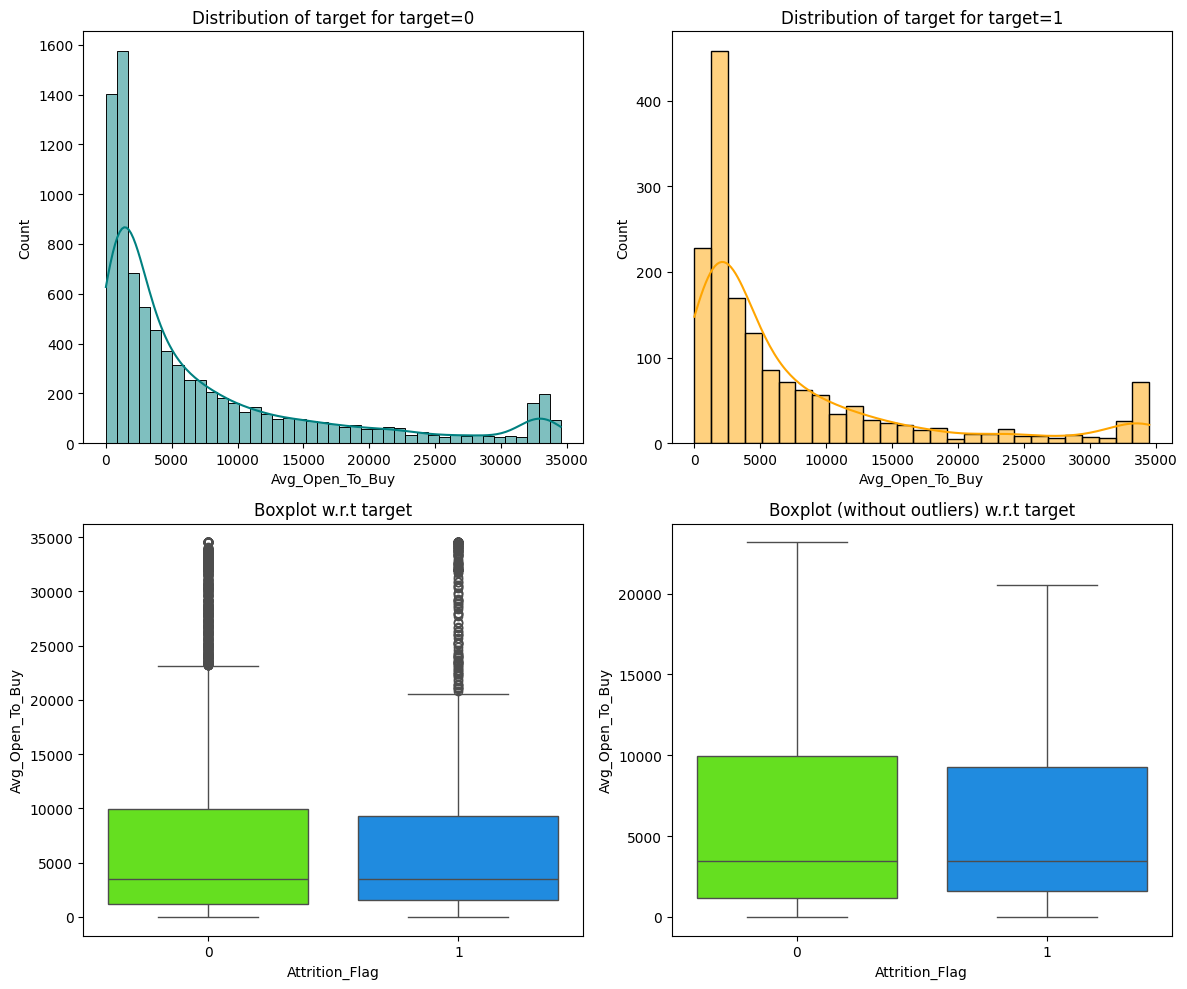

In [ ]:
# Plots the distritbution of Avg_Open_To_Buy with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Avg_Open_To_Buy', 'Attrition_Flag')

* The plots have a right skewed distribution with many outliers

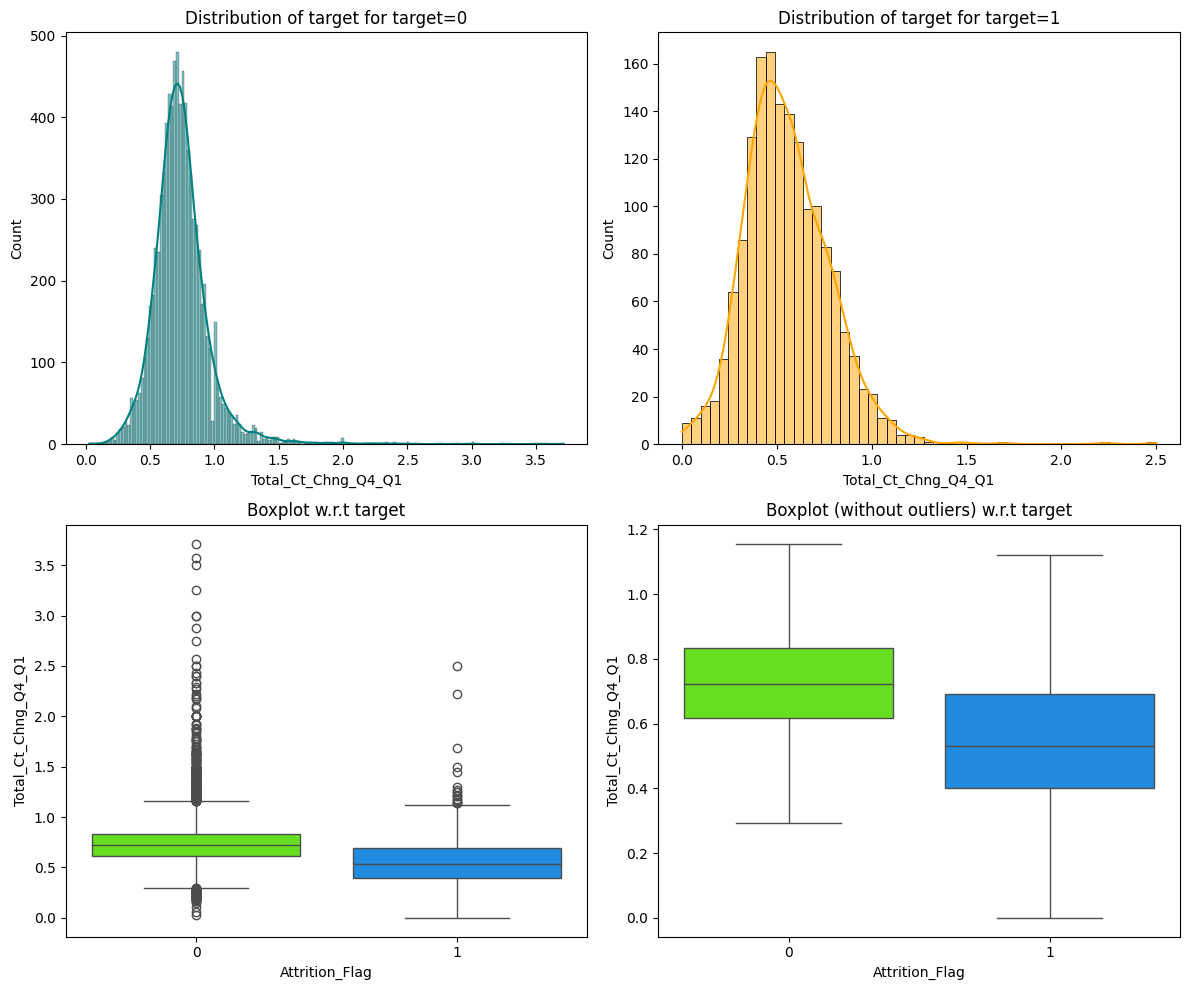

In [ ]:
# Plots the distribution of Total_Ct_Chng_Q4_Q1 with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

* The plots have a normal distribution with many outliers

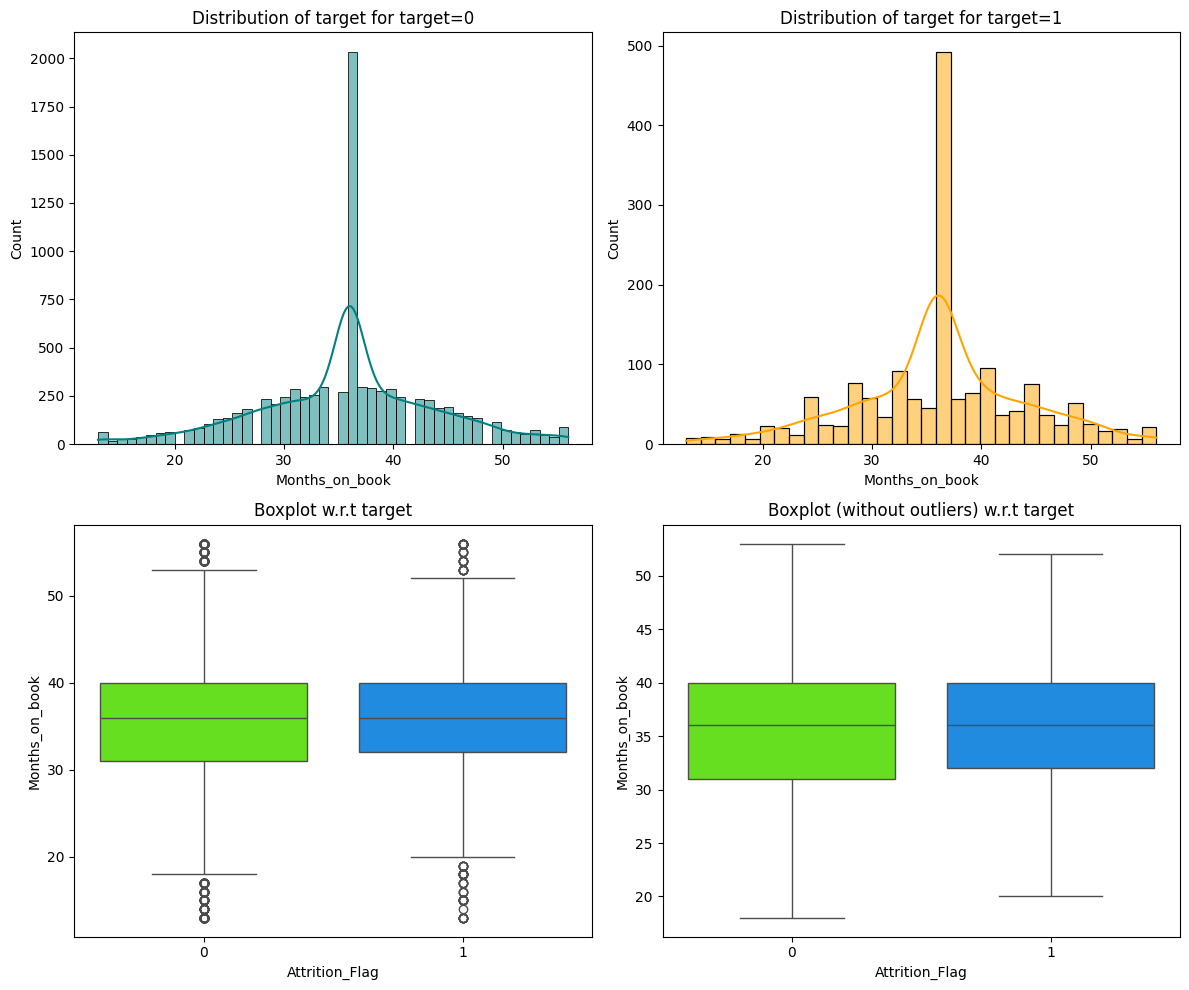

In [ ]:
# Plots the distribution of Months_on_book with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Months_on_book', 'Attrition_Flag')

* Both histograms have normal distribution with a very high mode
* Both boxplots show that there are many outliers

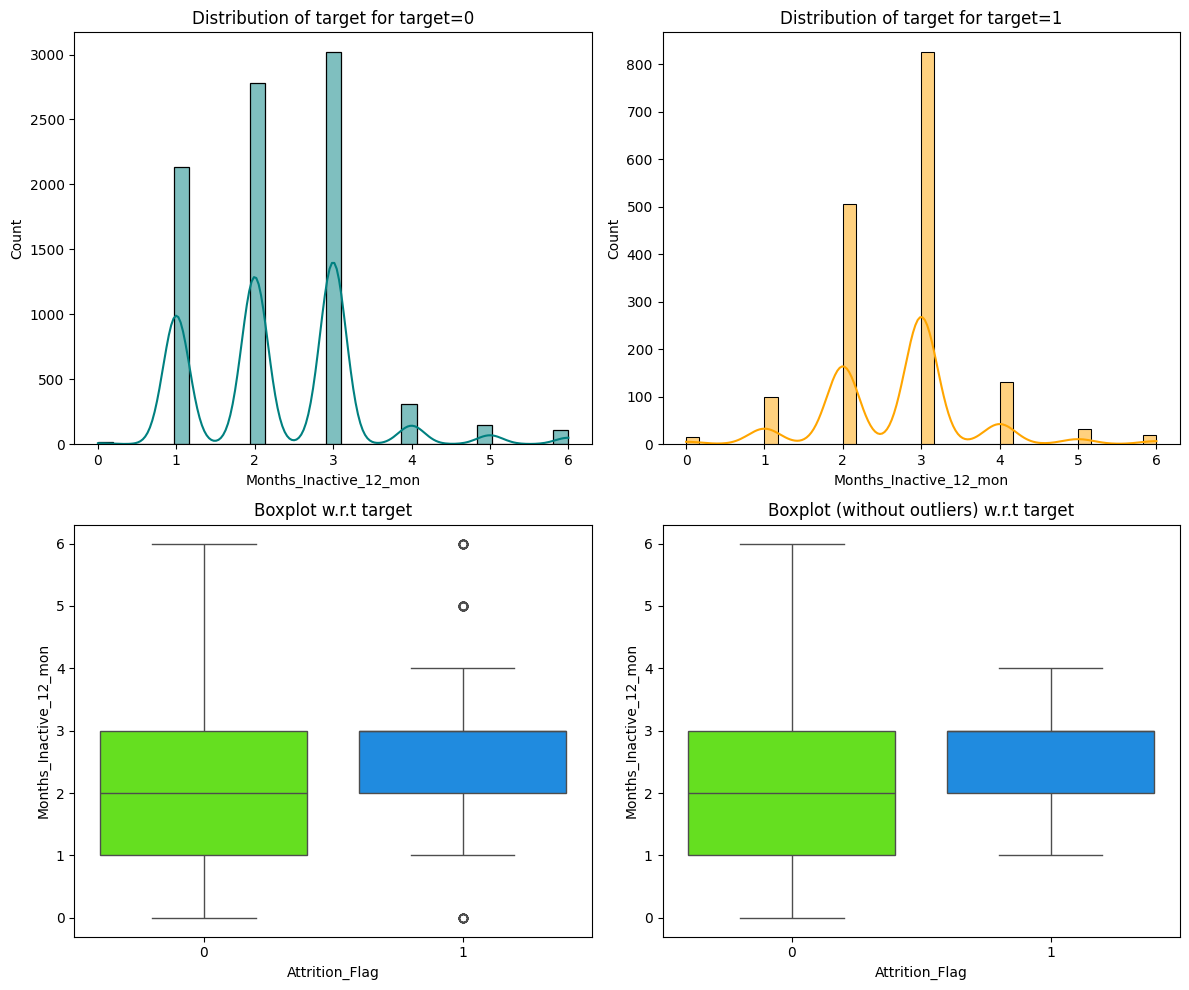

In [ ]:
# Plots the distribution of Months_Inactive_12_mon with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Months_Inactive_12_mon', 'Attrition_Flag')

* The boxplot for attrited customers has a few outliers

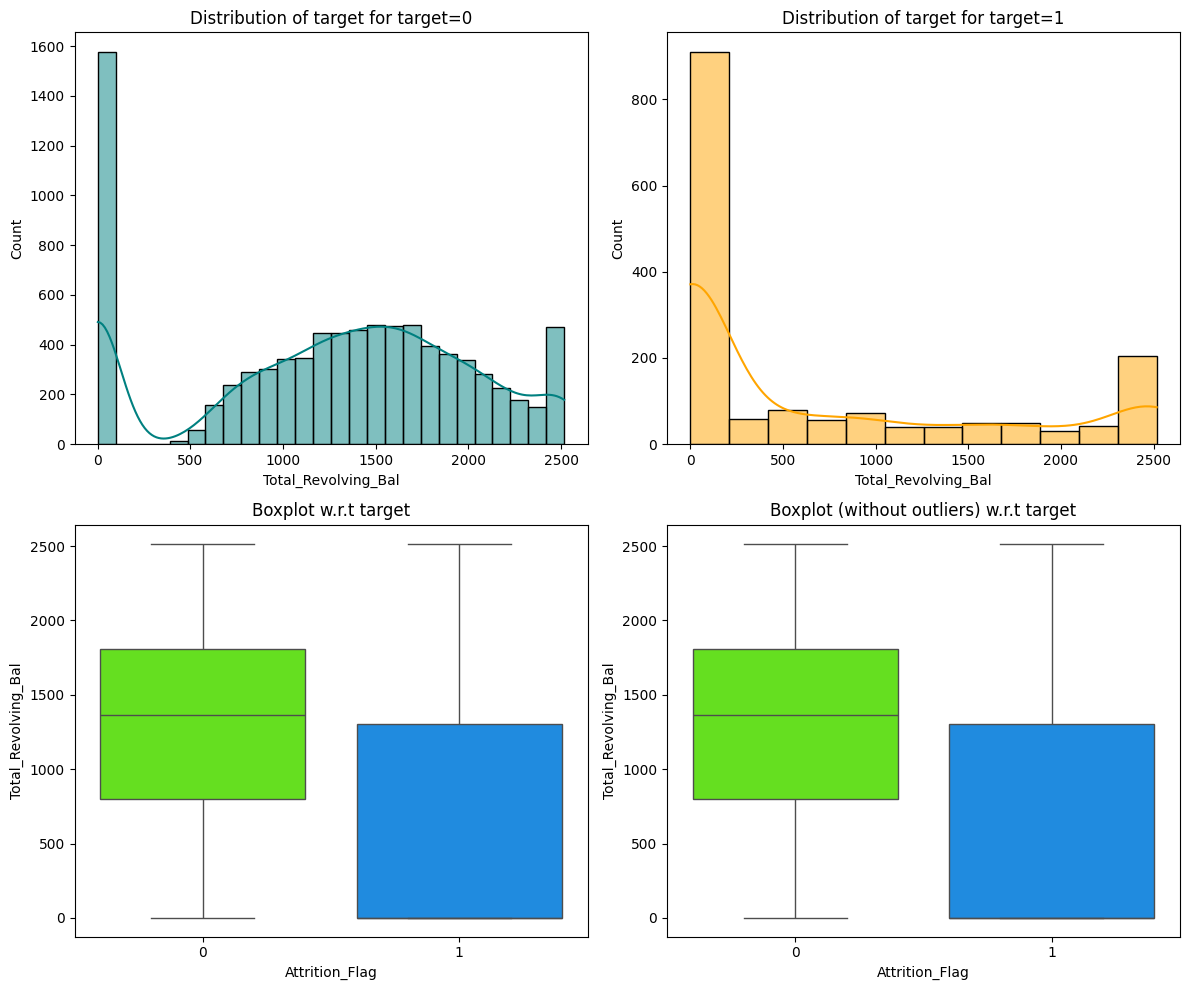

In [ ]:
# Plots the distritbution of Totsl_Revolving_Bal with respect to Attrition_Flag
distribution_plot_wrt_target(dataframe, 'Total_Revolving_Bal', 'Attrition_Flag')

* The boxplot for existing customers has a normal distrbution
* The plots for attrited customers have a right-skewed distribution

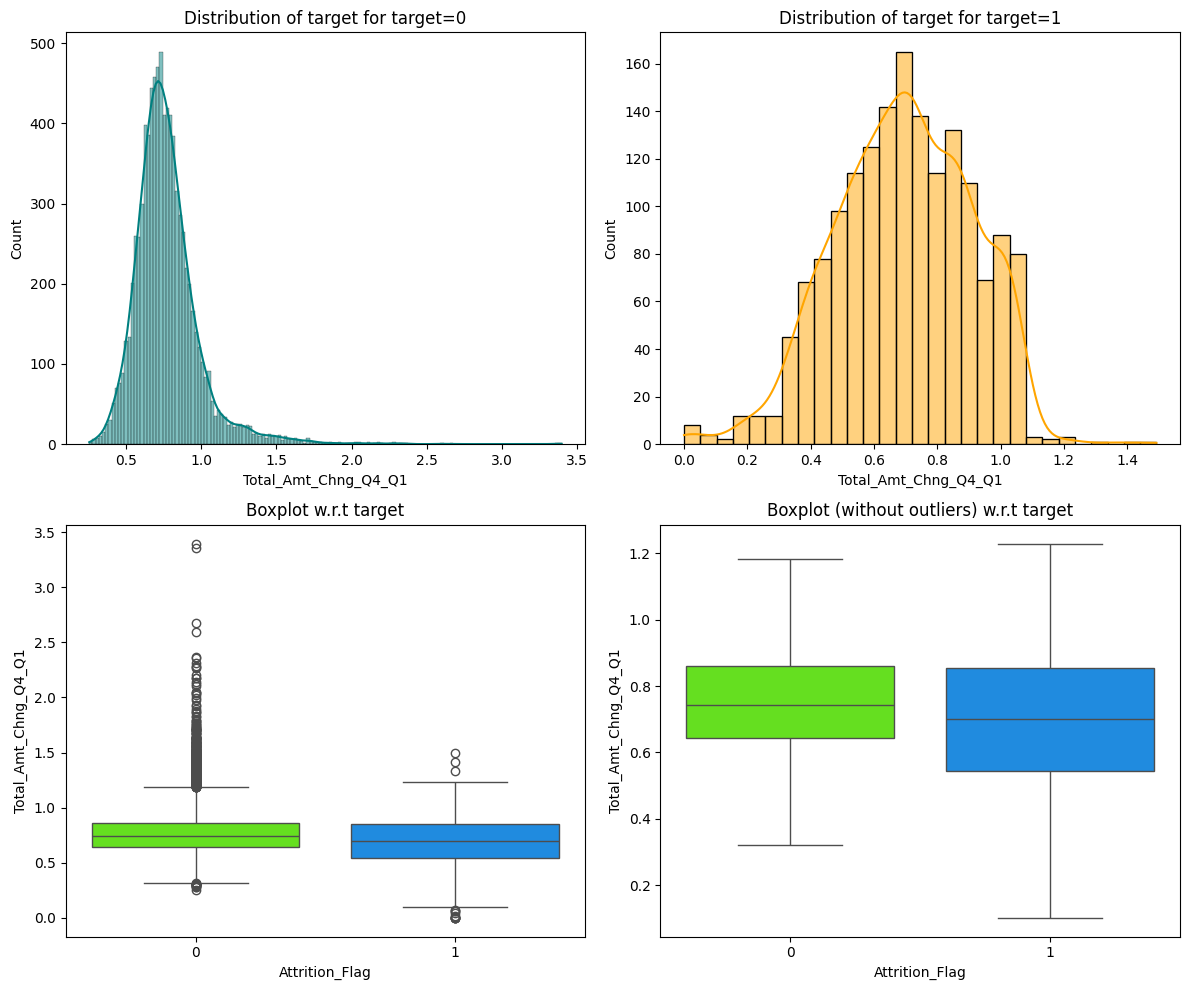

In [ ]:
# Plots the distribution of Total_Amt_Chng_Q4_Q1 with respect to Attrition Flag
distribution_plot_wrt_target(dataframe, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

* Outliers are present in the data
* The histogram for both existing and attrited customers have a normal distribution

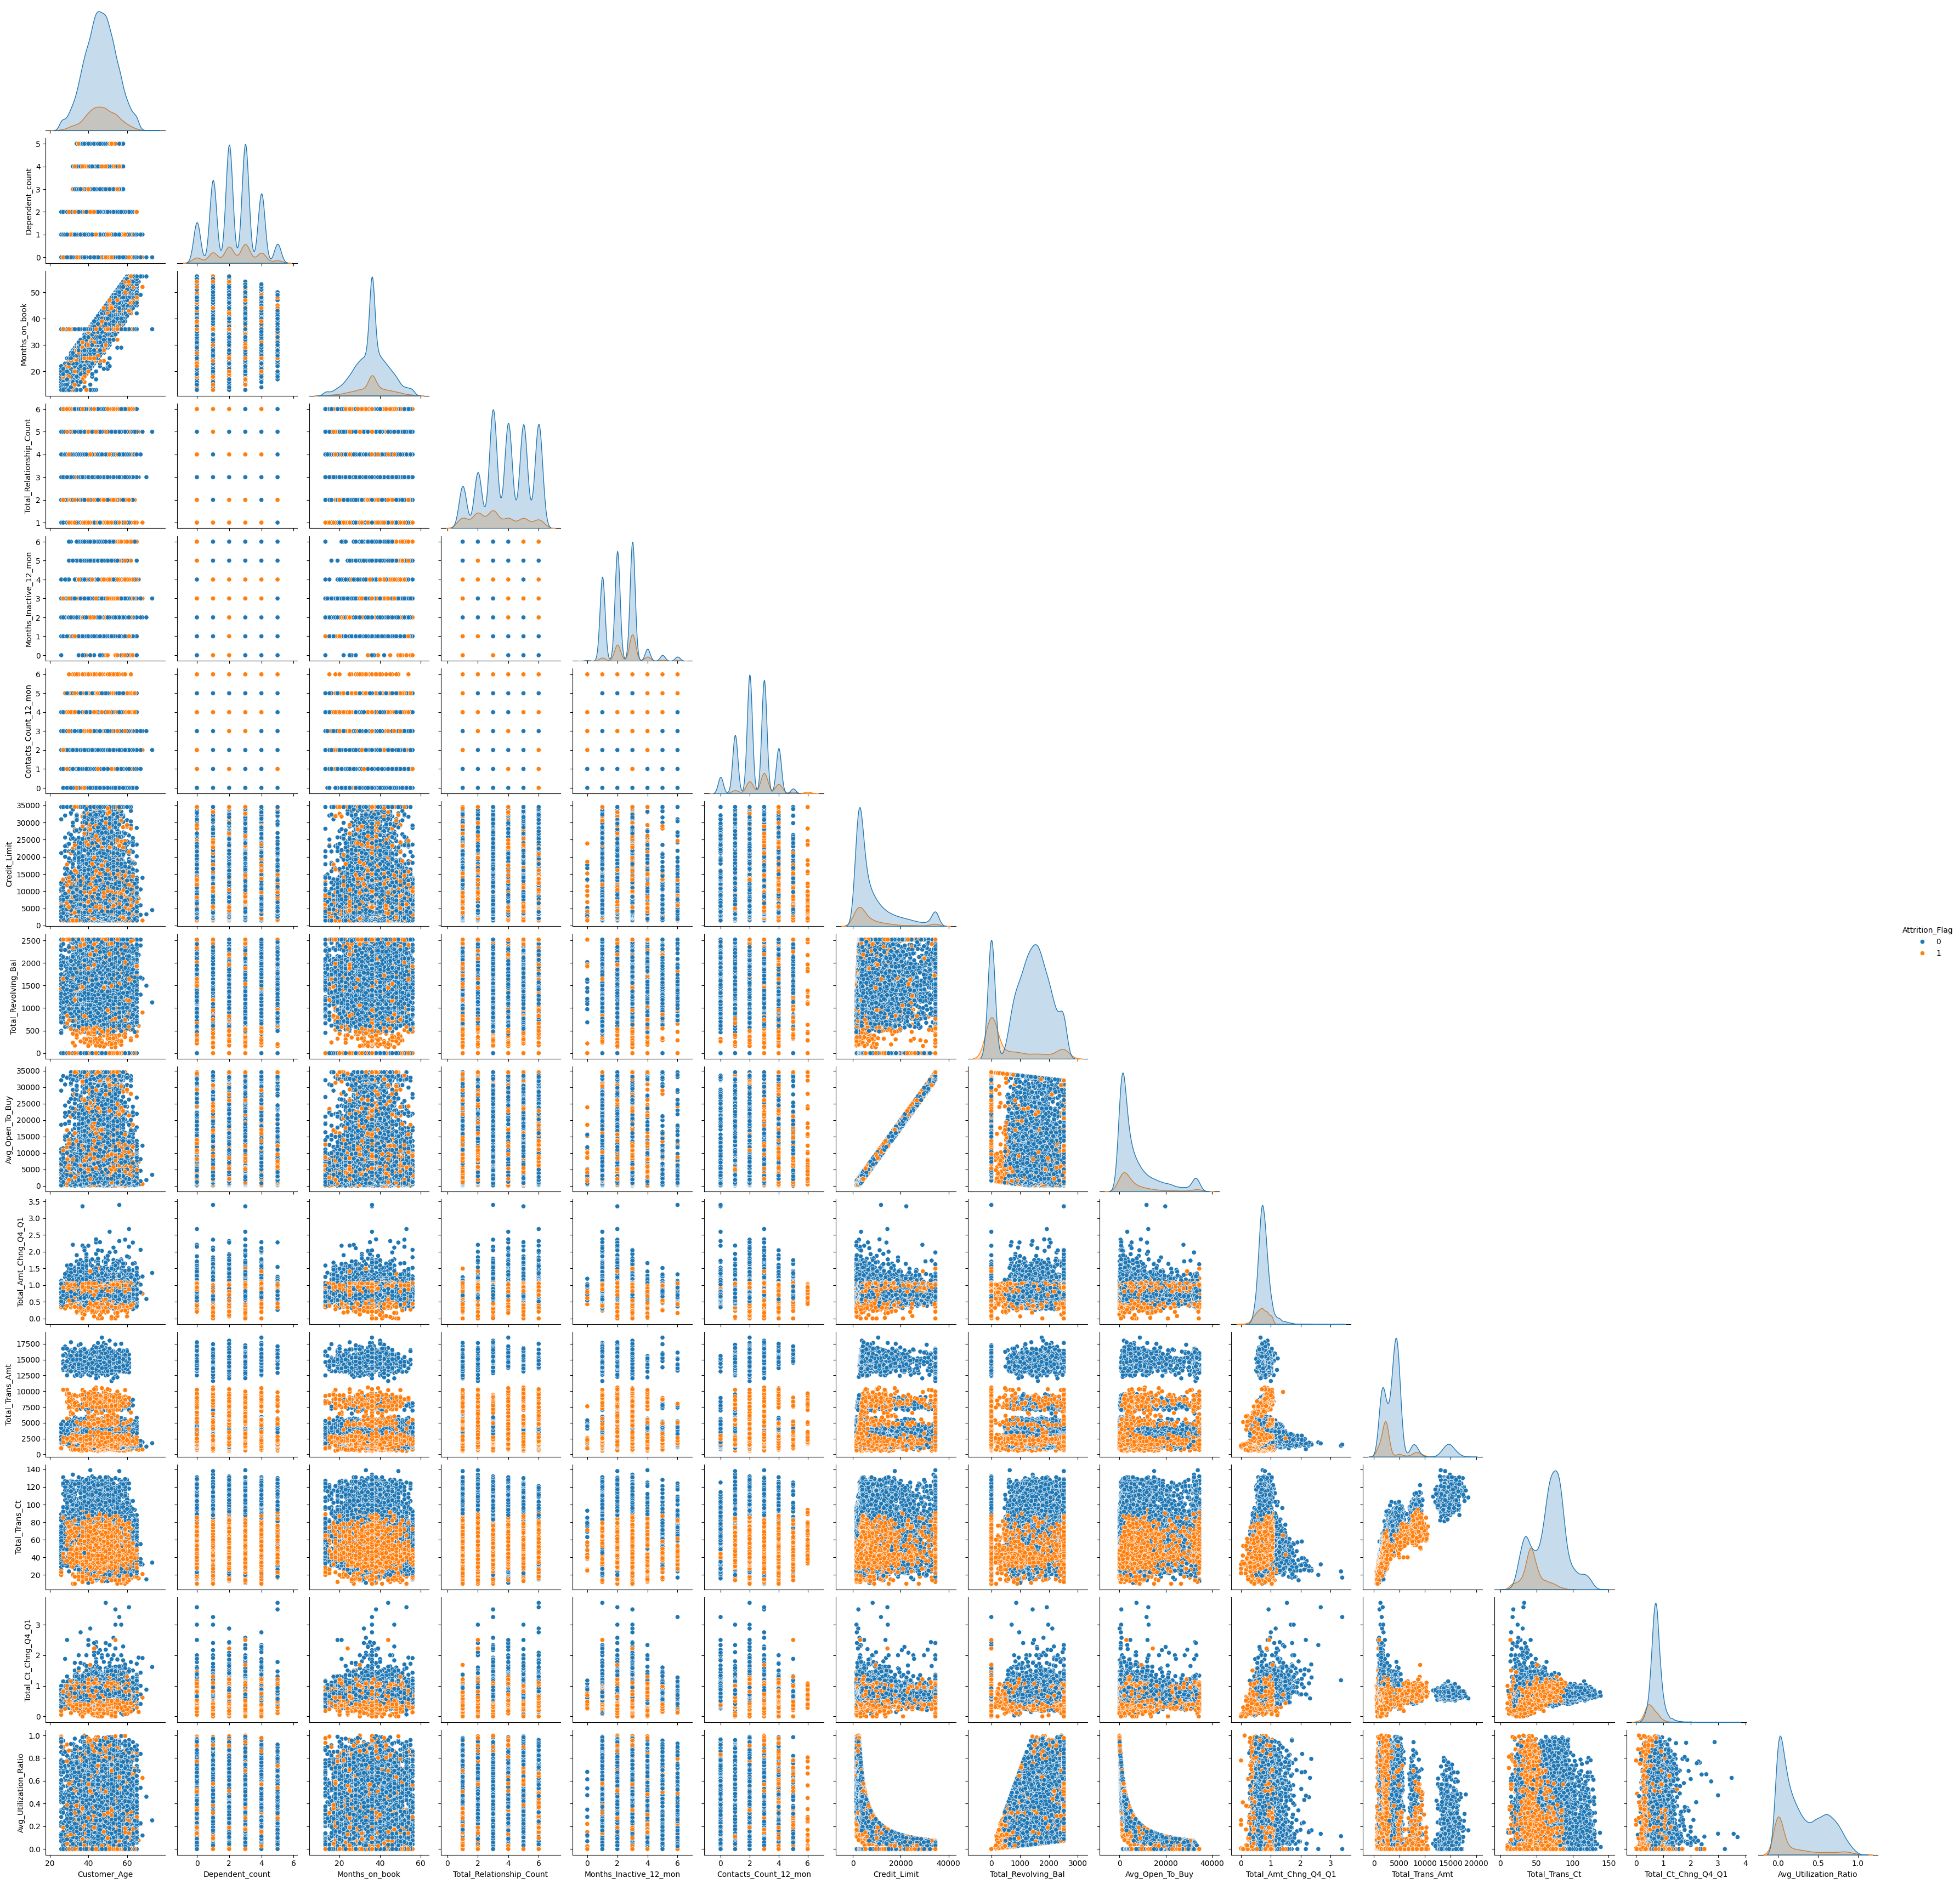

In [ ]:
# Shows a pairplot to visualize relationship between variables based on Attrition_Flag
sns.pairplot(dataframe, hue='Attrition_Flag', corner=True)

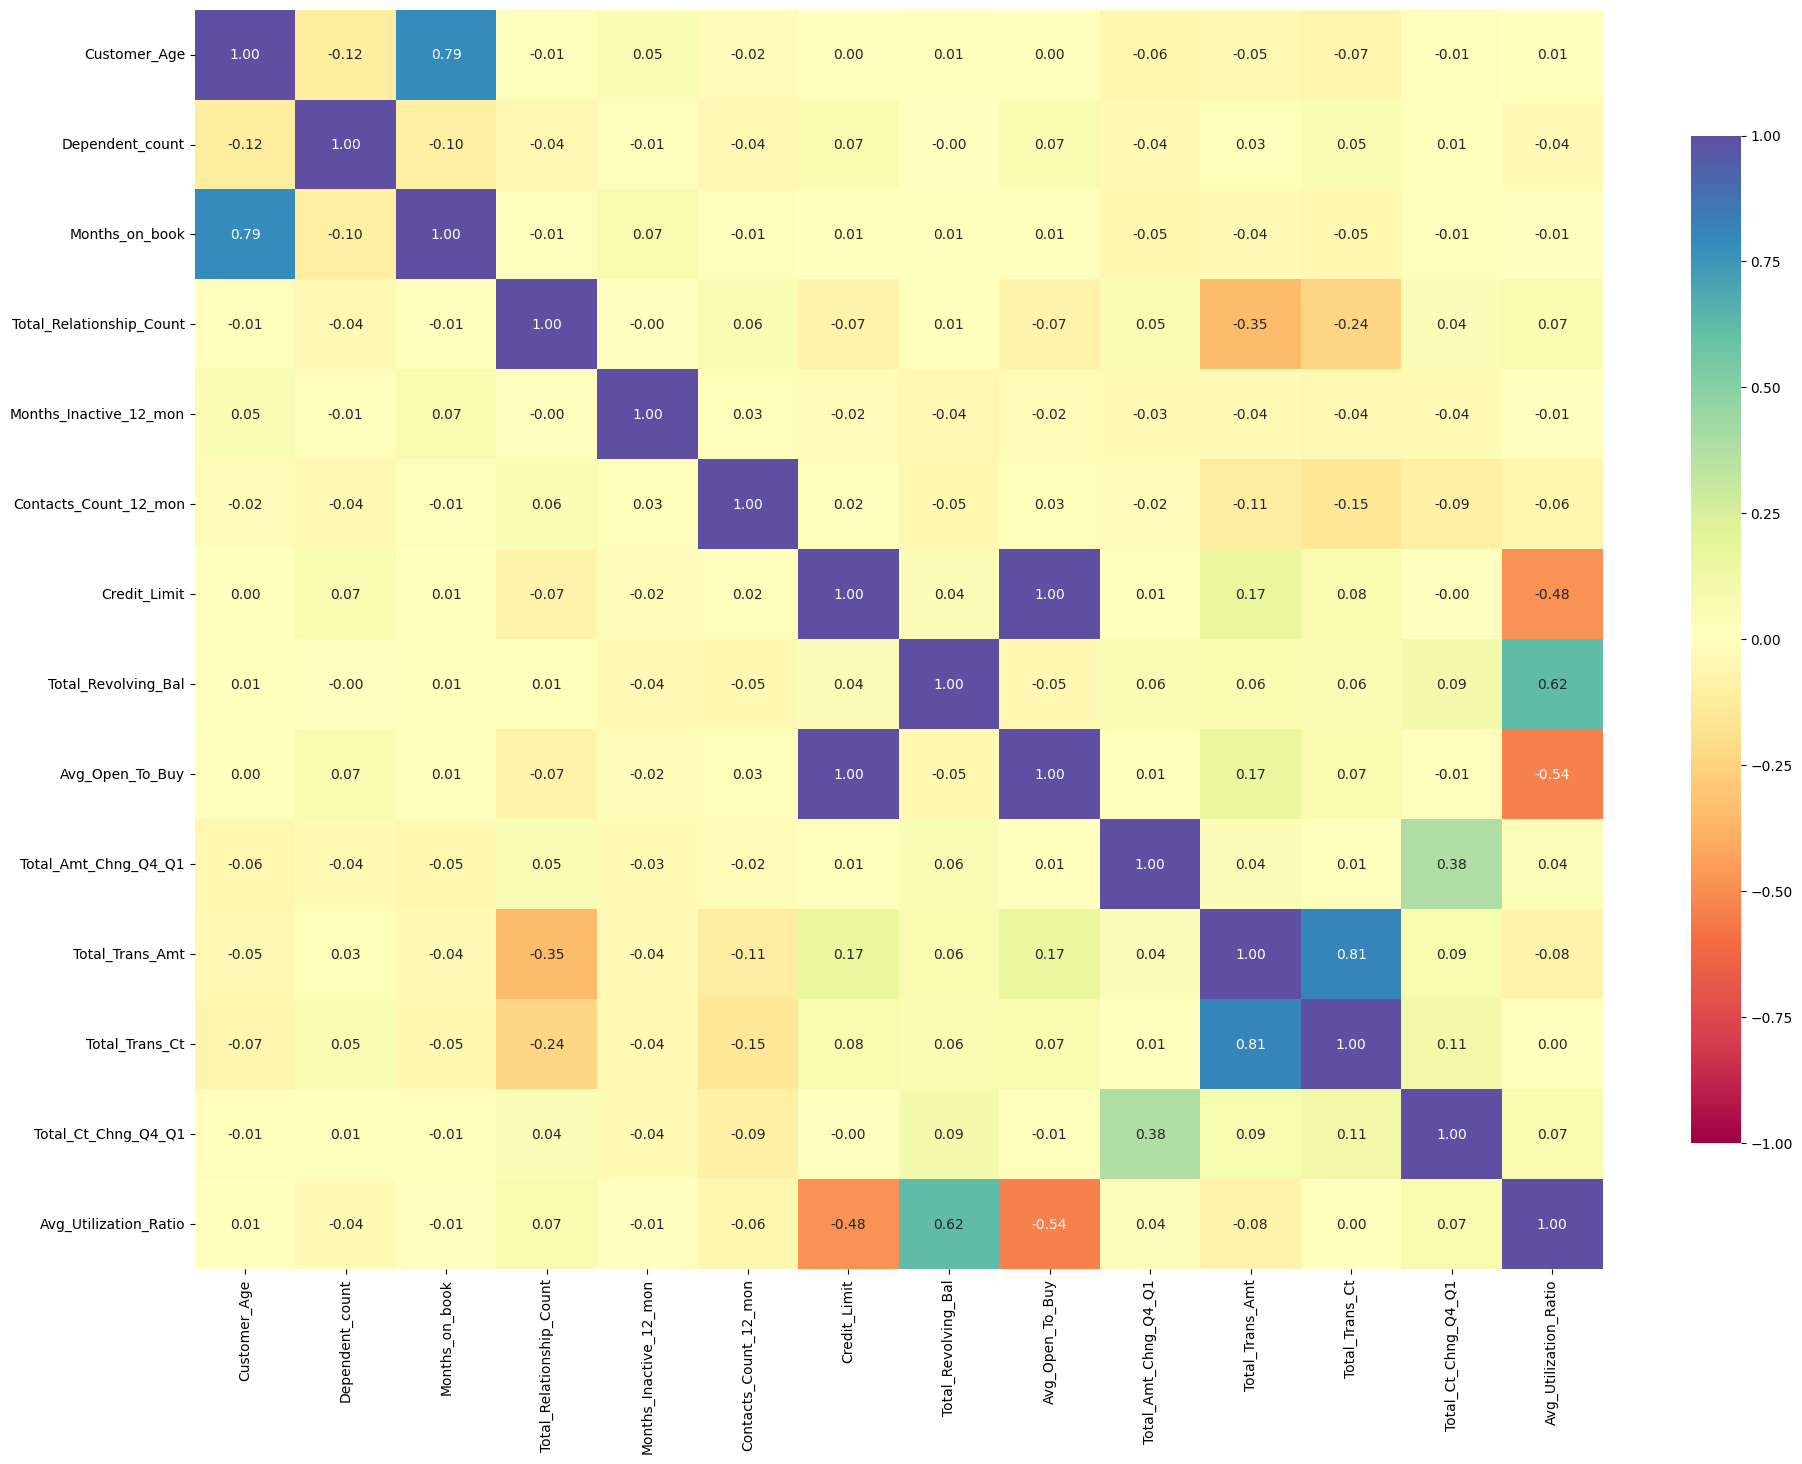

In [ ]:
# Select numerical columns from the DataFrame for correlation analysis
numerical_columns = dataframe.select_dtypes(include=np.number)

# Set the figure size for the heatmap
plt.figure(figsize=(20, 15))  # Width: 20, Height: 15 to allow for better spacing

# Create a heatmap to visualize the correlation matrix of numerical columns
sns.heatmap(
    numerical_columns.corr(),  # Compute and plot the correlation matrix
    annot=True,                # Display the correlation coefficients on the heatmap
    cmap="Spectral",            # Set the color map to Spectral
    vmin=-1,                   # Set the minimum value for the color scale
    vmax=1,                    # Set the maximum value for the color scale
    fmt=".2f",                 # Format the annotation text to two decimal places
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size (shrink it to 80%)
)

# Adjust layout to prevent overlap and improve spacing of elements
plt.tight_layout(pad=2.0)  # Set padding around the heatmap

# Display the heatmap
plt.show()

* Months_on_book and Customer_Age are highly correlated
* Total_Revolving_Bal and Avg_Utilization_Ratio has the second highest correlation

Key EDA Analysis:
* Months_Inactive_12_mon: Very few customers had non operational account for more than 3 months
* Total_Ct_Chng_Q4_Q1: Based on analysis, existing customers have a median closer to 70 whereas the attrited customers have a median of about 50. The ratio of Q1 and Q4 (Q1/Q4) is much lower for existing customers indicating that the attrited customers are spending less than that of the year compared to existing customers. Total_Ct_Chng_Q4_Q1 is much lower for attrited customers compared to exsting customers.
* Credit_Limit and Avg_Utilization_Ratio: It has been observed that customers wih a higher credit tend to have lower utilization. Therefore, it is negatively correlated.
* Total_Revolving_Bal and Avg_Utilization_Ratio: When a customer has a high utilization, they are more likely to have a higher revolving balance. Therefore,it is positively correlated.
* Avg_Open_To_Buy and Avg_Utilization_Ratio: It is negatively correlate as the higher a customer utilization, the lesser their amount available to buy.
* Avg_Open_To_Buy and Credit_Limit are directly proportional to their necessity. It also affects the buying capacity of the customer as their credit limit increases.
* Customer_Age and Months_on_book: As the customer age increases, their time with the bank also increases. Therefore, it is positively correlated.
* Total_Trans_Amt and Total_Trans_Ct: When a customer makes more transactions, the more they spend. Therefore, it is positively correlated.

## Data Pre-processing

###Outlier Detection

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Select only numeric columns
numeric_df = dataframe.select_dtypes(include=[np.number])

# Calculate IQR and bounds
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers
outliers = (numeric_df < lower) | (numeric_df > upper)

# Optionally, count the outliers
outlier_counts = outliers.sum()

print(outlier_counts)

Customer_Age                  2
Dependent_count               0
Months_on_book              386
Total_Relationship_Count      0
Months_Inactive_12_mon      331
Contacts_Count_12_mon       629
Credit_Limit                984
Total_Revolving_Bal           0
Avg_Open_To_Buy             963
Total_Amt_Chng_Q4_Q1        396
Total_Trans_Amt             896
Total_Trans_Ct                2
Total_Ct_Chng_Q4_Q1         394
Avg_Utilization_Ratio         0
dtype: int64


###Train_Test_Split

In [ ]:
# Creates the independent variable
X = dataframe.drop(['Attrition_Flag'], axis=1)

# Creates the dependent variable
y = dataframe['Attrition_Flag']

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Splits the data into training and temp dataframes
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Splits the temp dataframe into validation and test dataframes
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1)

## Missing value imputation




In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Printing the number of na values in each data frame.
# The columns with na values are aleady known from previous lines.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 1673
******************************
Number of X_val na values: 1019
******************************
Number of X_test na values: 688


In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Creates an imputer to impute values by the mode.
impute_by_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Creates list of column labels that need to be imputed.
column_impute = ['Education_Level', 'Income_Category', 'Marital_Status']

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Imputes X_train columns.
X_train[column_impute] = impute_by_mode.fit_transform(X_train[column_impute])
# Imputes X_val columns.
X_val[column_impute] = impute_by_mode.fit_transform(X_val[column_impute])
# Imputes X_test columns.
X_test[column_impute] = impute_by_mode.fit_transform(X_test[column_impute])

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Prints the number of na values in each dataset
print("Number of X_train na values:", X_train.isna().sum().sum())
print("Number of X_val na values:", X_val.isna().sum().sum())
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
Number of X_val na values: 0
Number of X_test na values: 0


In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Drops first of each encoded column to reduce the size of the dataframe
# Encodes X_train dataframe categorical columns.
X_train = pd.get_dummies(X_train, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encodes X_val dataframe categorical columns.
X_val = pd.get_dummies(X_val, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encodes X_test dataframe categorical columns.
X_test = pd.get_dummies(X_test, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Prints shape of new dataframes.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (5063, 29)
Shape of X_val: (3038, 29)
Shape of X_test: (2026, 29)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
# As referenced by Kyle Darden (@dardenkyle)
# Defines a function to create a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9904076738609112
Random Forest: 1.0
AdaBoost: 0.8752997601918465
Gradient Boosting: 0.9028776978417267
XGBoost: 1.0

Validation Performance:

Bagging: 0.8202959830866807
Random Forest: 0.8076109936575053
AdaBoost: 0.8414376321353065
Gradient Boosting: 0.854122621564482
XGBoost: 0.8900634249471459


* Random Forest and XGBoost have 100% recall on the training set.
* XGBoost has the highest recall of 89% on the validation set.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
models_oversampled = []  # Empty list to store all the models

# Appending models into the list
models_oversampled.append(("Bagging", BaggingClassifier(random_state=1)))
models_oversampled.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_oversampled.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_oversampled.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_oversampled.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models_oversampled:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models_oversampled:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9988009592326139
Random Forest: 1.0
AdaBoost: 0.8968824940047961
Gradient Boosting: 0.9316546762589928
XGBoost: 1.0

Validation Performance:

Bagging: 0.8731501057082452
Random Forest: 0.8773784355179705
AdaBoost: 0.8816067653276956
Gradient Boosting: 0.919661733615222
XGBoost: 0.9027484143763214


* Random Forest and XGBoost have 100% recall on the training set
* Gradient Boost has a recall of 91.96% on the validation set

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_under.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_under.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_under.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9916067146282974
Random Forest: 1.0
AdaBoost: 0.960431654676259
Gradient Boosting: 0.9916067146282974
XGBoost: 1.0

Validation Performance:

Bagging: 0.9133192389006343
Random Forest: 0.9513742071881607
AdaBoost: 0.9408033826638478
Gradient Boosting: 0.9577167019027484
XGBoost: 0.9534883720930233


* Random Forest and XGBoost have 100% recall on the training set
* Gradient Boost has the highest recall of 95.77% on the validation set

### HyperparameterTuning

* Out of 15 models, 3 models with the highest recall scores were chosen. XGBoost trained on original data, Gradient Boost trained on oversampled and undersampled data were chosen due to its high recall score on the validation set.
* Models with high recall scores are more likely to reduce False Negatives to fulfill the objective of this project.

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning method for XGBoost with original data

In [ ]:
# defining model
XGB_org = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defines the scorer
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9196378327681985:


In [ ]:
# Creates the tuned model for XGBoost using Original Data
XGB_org_tuned = XGBClassifier(
    gamma=3,
    learning_rate=0.05,
    n_estimators=75,
    random_state=1,
    scale_pos_weight=5,
    subsample=0.7
    )

# Fits the model on the original training data
XGB_org_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checks model performance metrics on training set
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

Accuracy  Recall  Precision    F1
0     0.980   0.999      0.892 0.942

In [ ]:
# Saves the model performance metrics for comparison
XGB_org_tuned_train_score = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

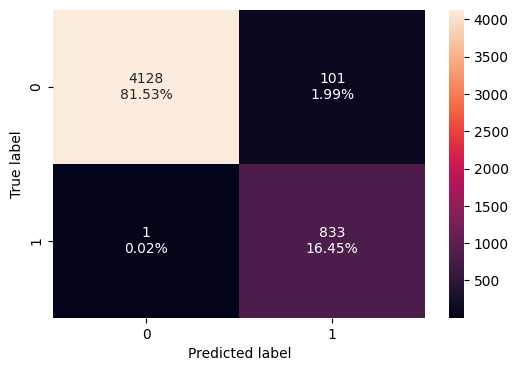

In [ ]:
# Shows confusion matrix for training set
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [ ]:
# Checks model performance metrics on validation set
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

Accuracy  Recall  Precision    F1
0     0.956   0.943      0.805 0.869

In [ ]:
# Saves model performance metrics for comparison
XGB_org_tuned_val_score = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

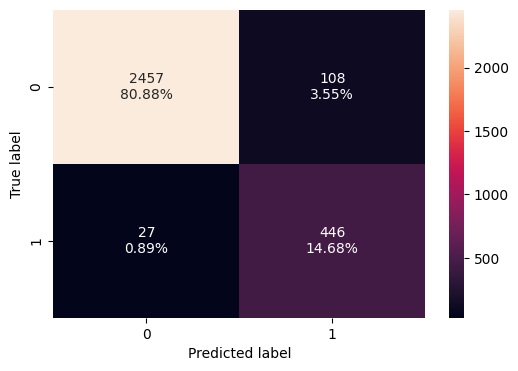

In [ ]:
# Shows the confusion matrix for validation set
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

#### Tuning method for Gradient Boosting with oversampled data

In [ ]:
# defining model
GB_over = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Defines the scorer
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GB_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.943727670765314:


In [ ]:
# Creates tuned model with the best parameters found using RandomizedSearchCV
GB_over_tuned = GradientBoostingClassifier(
    init=DecisionTreeClassifier(random_state=1),
    learning_rate=0.05,
    max_features=0.7,
    n_estimators=100,
    random_state=1,
    subsample=0.7
)

# Fits the model on the oversampled training data
GB_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Checks model performance metrics for oversampled training set
model_performance_classification_sklearn(GB_over_tuned, X_train_over, y_train_over)

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Saves the model performance metrics for oversampled training set for comparison
GB_over_tuned_train_score = model_performance_classification_sklearn(GB_over_tuned, X_train_over, y_train_over)

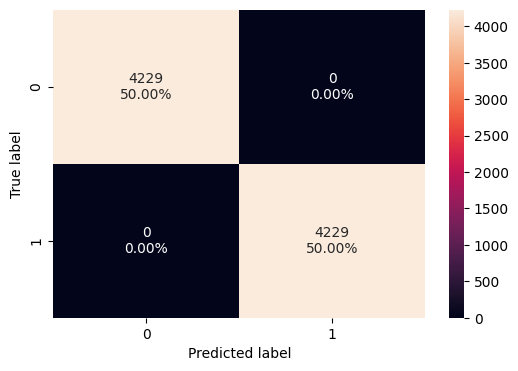

In [ ]:
# Shows the confusion matrix for oversampled training set
confusion_matrix_sklearn(GB_over_tuned, X_train_over, y_train_over)

In [ ]:
# Shows the model performance metrics for oversampled validation set
model_performance_classification_sklearn(GB_over_tuned, X_val, y_val)

Accuracy  Recall  Precision    F1
0     0.925   0.814      0.733 0.772

In [ ]:
# Saves the model performance metrics for oversampled validation set
GB_over_tuned_val_score = model_performance_classification_sklearn(GB_over_tuned, X_val, y_val)

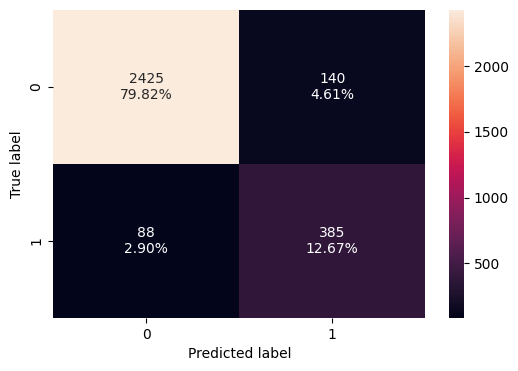

In [ ]:
# Shows the confusion matrix for oversampled validation set
confusion_matrix_sklearn(GB_over_tuned, X_val, y_val)

#### Tuning method for Gradient Boosting with undersampled data

In [ ]:
# defining model
GB_under = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Defines the scorer
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GB_under, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8968544838034775:


In [ ]:
# Creates tuned model with the best parameters found using RandomizedSearchCV
GB_under_tuned = GradientBoostingClassifier(
    init=DecisionTreeClassifier(random_state=1),
    learning_rate=0.05,
    max_features=0.7,
    n_estimators=100,
    random_state=1,
    subsample=0.7
)

# Fits the model on the undersampled training data
GB_under_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Shows the model performance metrics for undersampled training set
model_performance_classification_sklearn(GB_under_tuned, X_train_un, y_train_un)

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Saves the model performance metrics for undersampled training set for comparison
GB_under_tuned_train_score = model_performance_classification_sklearn(GB_under_tuned, X_train_un, y_train_un)

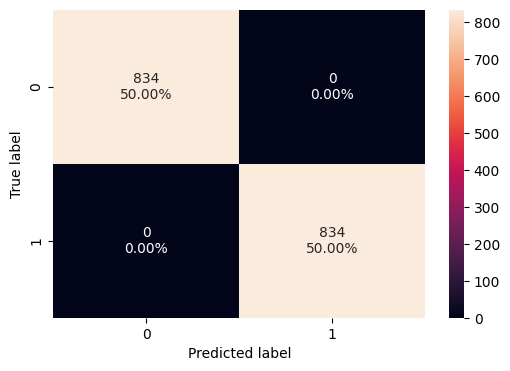

In [ ]:
# Shows the confusion matrix for undersampled training set
confusion_matrix_sklearn(GB_under_tuned, X_train_un, y_train_un)

In [ ]:
# Shows the model performance metrics for undersampled validation set
model_performance_classification_sklearn(GB_under_tuned, X_val, y_val)

Accuracy  Recall  Precision    F1
0     0.900   0.924      0.619 0.741

In [ ]:
# Saves the model performance metrics for undersampled validation set for comparison
GB_under_tuned_val_score = model_performance_classification_sklearn(GB_under_tuned, X_val, y_val)

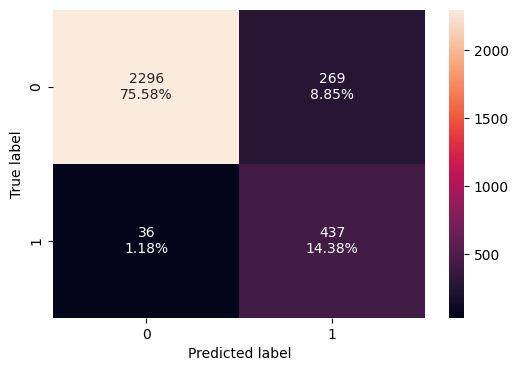

In [ ]:
# Shows the confusion matrix for undersampled validation set
confusion_matrix_sklearn(GB_under_tuned, X_val, y_val)

## Model Comparison and Final Model Selection

In [ ]:
# Comparison of Training Performance
models_train_performance = pd.concat([XGB_org_tuned_train_score.T
                                      ,GB_over_tuned_train_score.T,
                                      GB_under_tuned_train_score.T],
                                     axis=1
                                     )
models_train_performance.columns = ["XGBoost Trained with Original Data (Tuned)",
                                    "Gradient Boosting Trained with Oversampled Data (Tuned)",
                                    "Gradient Boosting Trained with Undersampled Data (Tuned)"]

print("Comparison of Training Performance")
models_train_performance

Comparison of Training Performance


XGBoost Trained with Original Data (Tuned)  \
Accuracy                                        0.980   
Recall                                          0.999   
Precision                                       0.892   
F1                                              0.942   

           Gradient Boosting Trained with Oversampled Data (Tuned)  \
Accuracy                                               1.000         
Recall                                                 1.000         
Precision                                              1.000         
F1                                                     1.000         

           Gradient Boosting Trained with Undersampled Data (Tuned)  
Accuracy                                               1.000         
Recall                                                 1.000         
Precision                                              1.000         
F1                                                     1.000

* The performance metrics above suggests that the model was overfitting on the training set in all categories (original, undersampled, oversampled)

In [ ]:
# Comparison of Validation Performance
models_val_performance = pd.concat([XGB_org_tuned_val_score.T
                                    ,GB_over_tuned_val_score.T,
                                    GB_under_tuned_val_score.T],
                                   axis=1
                                   )
models_val_performance.columns = ["XGBoost Trained with Original Data (Tuned)",
                                  "Gradient Boosting Trained with Oversampled Data (Tuned)",
                                  "Gradient Boosting Trained with Undersampled Data (Tuned)"]

print("Comparison of Validation Performance")
models_val_performance

Comparison of Validation Performance


XGBoost Trained with Original Data (Tuned)  \
Accuracy                                        0.956   
Recall                                          0.943   
Precision                                       0.805   
F1                                              0.869   

           Gradient Boosting Trained with Oversampled Data (Tuned)  \
Accuracy                                               0.925         
Recall                                                 0.814         
Precision                                              0.733         
F1                                                     0.772         

           Gradient Boosting Trained with Undersampled Data (Tuned)  
Accuracy                                               0.900         
Recall                                                 0.924         
Precision                                              0.619         
F1                                                     0.741

* XGBoost tuned model trained with original data has the highest recall score of 94.3%.
* Therefore, XGBoost tuned model trained with original data was selected as the final model to be used on the test set
* XGBoost trained with original data also has the best model performance due to its high F1 score.

### Test set final performance

In [ ]:
# Saves XGBoost Tuned (Original Data) as the final model
final_model = XGB_org_tuned

In [ ]:
# Shows the model performance metrics for the final model on the test set
model_performance_classification_sklearn(final_model, X_test, y_test)

Accuracy  Recall  Precision    F1
0     0.947   0.909      0.789 0.845

* The final model has a recall of 90.9% with an accuracy of 94.7%.

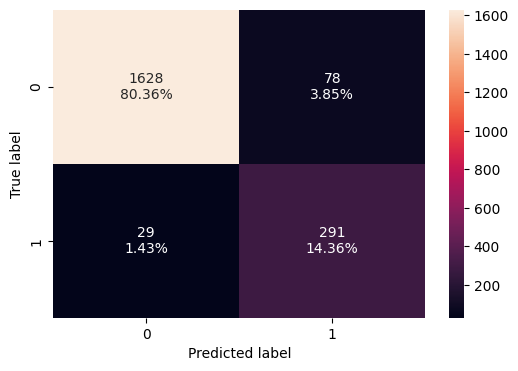

In [ ]:
# Shows the confusion matrix for the final model on the test set
confusion_matrix_sklearn(final_model, X_test, y_test)

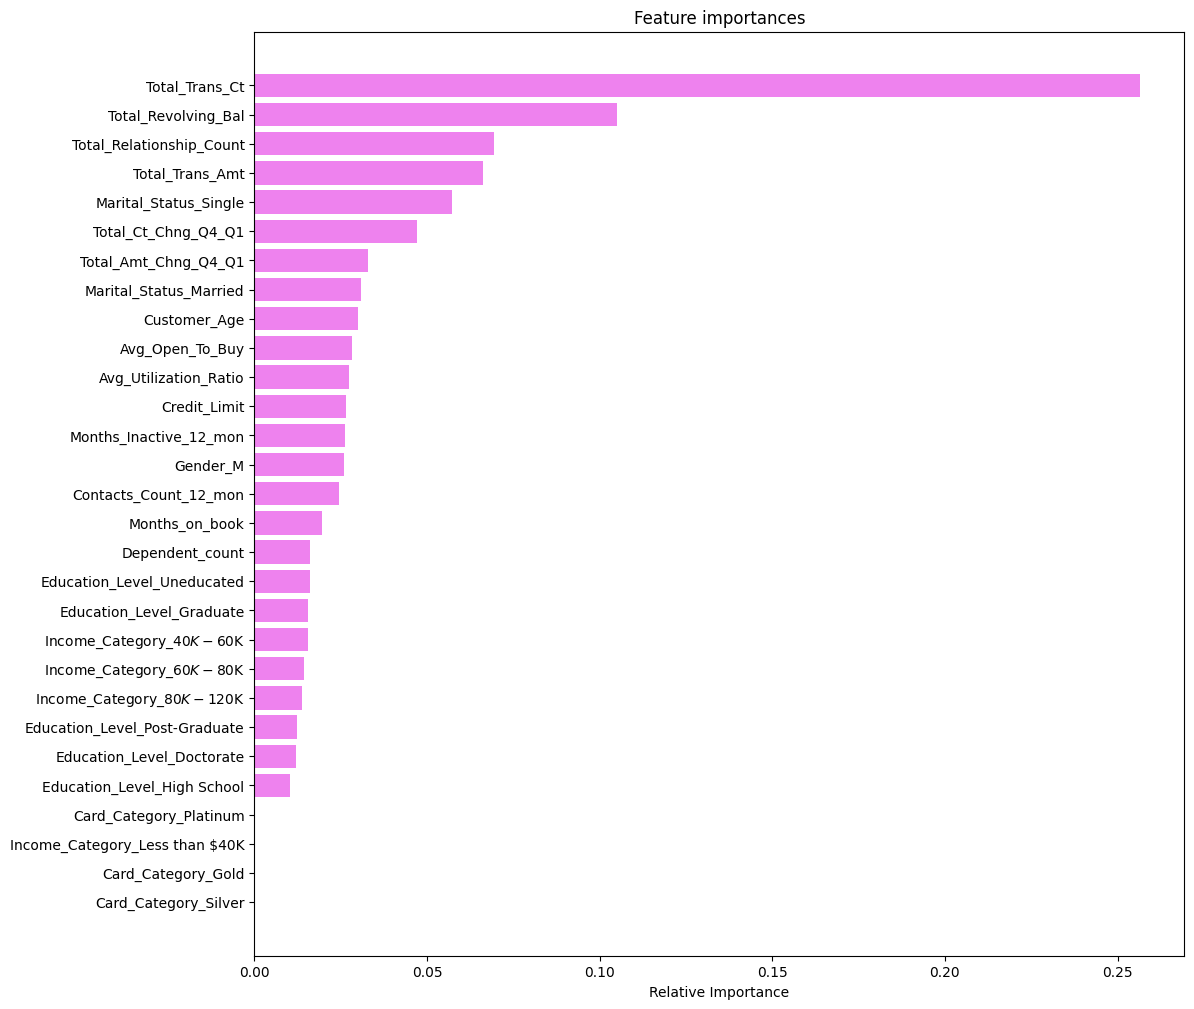

In [ ]:
# Creates a plot showing the relative importance of the independent variables
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Ct, Total_Revolving_Bal, Total_Relationship_Count and Total_Trans_Amt are the most features to predict how many customers will attrite

# Business Insights and Conclusions

* XGBoost trained with original data (tuned) was selected as the best model due to its high recall for evaluation on the test set.
* This predictive model can be used by the bank to identify customers who are at the risk of attrition, so that preventative and corrective actions can be taken to retain customers
* The most contributing factors that need attention are Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt and Total_Relationship_Count.
* Attention needs to be given to female customers for marketing campaigns as they utilize most of their credit and make more higher transactions. Therefore, increasing their credit limit can be a viable solution.
* Months of inactivity or with very few transactions: Inactivity leads to attrition as in most scenarios.
* The customers who interacted the most with the bank have the highest rate of attrition due to bank's inability to resolve issues faced by the customer. By implementing a feedback system, each time a customer contacts, the bank could attempt to improve the customer relationship.


***